# Calculate total cost of goods needed- Section 1

## Import the data - suppliers, demand and recipes

In [1]:
import pandas as pd

In [2]:
suppliers = pd.read_csv("https://www.dropbox.com/s/jjbacrux6bc1b4s/suppliers.csv?dl=1")
demand = pd.read_csv("https://www.dropbox.com/s/0yikq3pugq87vl9/demand_forecasts.csv?dl=1")
recipes = pd.read_csv("https://www.dropbox.com/s/az97voeh6i8x3i2/recipes.csv?dl=1")

In [3]:
suppliers

,supp_id,ingredient_uuid,cost_per_unit,unit_name,country_of_origin,total_tax_per_unit,time_to_deliver
0,megacorp,cocoa,2500.0,tonne,ghana,14,12
1,megacorp,milk_powder,3200.0,tonne,france,12,3
2,megacorp,hazelnut,1918.0,tonne,turkey,12,4
3,megacorp,sugar,457.0,tonne,brazil,5,9
4,megacorp,vanilla,237.0,tonne,china,3,10
5,omni_inc,cocoa,2400.0,tonne,cote d'ivoire,14,12
6,omni_inc,milk_powder,3120.0,tonne,switzerland,0,2
7,omni_inc,hazelnut,1925.0,tonne,italy,12,3
8,omni_inc,sugar,465.0,tonne,india,5,12
9,omni_inc,vanilla,201.0,tonne,indonesia,3,12


In [4]:
# remove na. 15 rows remain. No na was dropped. 
suppliers.dropna()

,supp_id,ingredient_uuid,cost_per_unit,unit_name,country_of_origin,total_tax_per_unit,time_to_deliver
0,megacorp,cocoa,2500.0,tonne,ghana,14,12
1,megacorp,milk_powder,3200.0,tonne,france,12,3
2,megacorp,hazelnut,1918.0,tonne,turkey,12,4
3,megacorp,sugar,457.0,tonne,brazil,5,9
4,megacorp,vanilla,237.0,tonne,china,3,10
5,omni_inc,cocoa,2400.0,tonne,cote d'ivoire,14,12
6,omni_inc,milk_powder,3120.0,tonne,switzerland,0,2
7,omni_inc,hazelnut,1925.0,tonne,italy,12,3
8,omni_inc,sugar,465.0,tonne,india,5,12
9,omni_inc,vanilla,201.0,tonne,indonesia,3,12


In [5]:
# observe the demand dataframe
demand

,rec_id,month,demand
0,1,jan,16443
1,1,feb,18943
2,1,mar,19727
3,1,apr,10368
4,1,may,15125
5,1,jun,18413
6,1,jul,17442
7,1,aug,19986
8,1,sep,15302
9,1,oct,13637


In [6]:
# observe the recipes dataframe
recipes 

,rec_id,ingredient_uuid,cost_to_process,time_to_process,qty
0,1,cocoa,0.20,120,13
1,1,milk_powder,0.03,110,12
2,1,hazelnut,0.08,45,4
3,1,sugar,0.40,80,5
4,2,vanilla,0.10,34,3
5,2,cocoa,0.20,120,12
6,2,milk_powder,0.03,110,11
7,2,sugar,0.40,80,4
8,3,hazelnut,0.08,45,3
9,3,vanilla,0.10,34,2


## Calculate the cheapest supplier for each ingredient

In [7]:
# 'receipe' table merge with demand 
rec_dem= demand.merge(recipes, on='rec_id', how='inner')
rec_dem

,rec_id,month,demand,ingredient_uuid,cost_to_process,time_to_process,qty
0,1,jan,16443,cocoa,0.20,120,13
1,1,jan,16443,milk_powder,0.03,110,12
2,1,jan,16443,hazelnut,0.08,45,4
3,1,jan,16443,sugar,0.40,80,5
4,1,feb,18943,cocoa,0.20,120,13
...,...,...,...,...,...,...,...
151,3,dec,13065,hazelnut,0.08,45,3
152,3,dec,13065,vanilla,0.10,34,2
153,3,dec,13065,cocoa,0.20,120,12
154,3,dec,13065,milk_powder,0.03,11,12


In [8]:
# creat column 'demand_qty'= demand* qty, to calculate the aggregated demand based on qty 
rec_dem['demand_qty']= rec_dem['demand']*rec_dem['qty']
rec_dem=rec_dem.dropna()
rec_dem

,rec_id,month,demand,ingredient_uuid,cost_to_process,time_to_process,qty,demand_qty
0,1,jan,16443,cocoa,0.20,120,13,213759
1,1,jan,16443,milk_powder,0.03,110,12,197316
2,1,jan,16443,hazelnut,0.08,45,4,65772
3,1,jan,16443,sugar,0.40,80,5,82215
4,1,feb,18943,cocoa,0.20,120,13,246259
...,...,...,...,...,...,...,...,...
151,3,dec,13065,hazelnut,0.08,45,3,39195
152,3,dec,13065,vanilla,0.10,34,2,26130
153,3,dec,13065,cocoa,0.20,120,12,156780
154,3,dec,13065,milk_powder,0.03,11,12,156780


In [9]:
# table 'rec_dem' merge with suppliers table to create 'raw' table contains all the data
# 'rec_dem' contains 156 rows* 3 suppliers= 468 rows. All the data from both tables have been included.  
raw= rec_dem.merge(suppliers, on='ingredient_uuid', how='inner')
raw

,rec_id,month,demand,ingredient_uuid,cost_to_process,time_to_process,qty,demand_qty,supp_id,cost_per_unit,unit_name,country_of_origin,total_tax_per_unit,time_to_deliver
0,1,jan,16443,cocoa,0.2,120,13,213759,megacorp,2500.0,tonne,ghana,14,12
1,1,jan,16443,cocoa,0.2,120,13,213759,omni_inc,2400.0,tonne,cote d'ivoire,14,12
2,1,jan,16443,cocoa,0.2,120,13,213759,acme_inc,2370.0,tonne,indonesia,14,12
3,1,feb,18943,cocoa,0.2,120,13,246259,megacorp,2500.0,tonne,ghana,14,12
4,1,feb,18943,cocoa,0.2,120,13,246259,omni_inc,2400.0,tonne,cote d'ivoire,14,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
463,3,nov,15003,vanilla,0.1,34,2,30006,omni_inc,201.0,tonne,indonesia,3,12
464,3,nov,15003,vanilla,0.1,34,2,30006,acme_inc,185.0,tonne,madagascar,3,12
465,3,dec,13065,vanilla,0.1,34,2,26130,megacorp,237.0,tonne,china,3,10
466,3,dec,13065,vanilla,0.1,34,2,26130,omni_inc,201.0,tonne,indonesia,3,12


### Define if any missing data by the inner function

In [10]:
# add column 'cost_demand_qty' in the raw dataframe, = 'cost_per_unit'*'demand_qty'
raw['cost_demand_qty']= raw['cost_per_unit']*raw['demand_qty']
raw

,rec_id,month,demand,ingredient_uuid,cost_to_process,time_to_process,qty,demand_qty,supp_id,cost_per_unit,unit_name,country_of_origin,total_tax_per_unit,time_to_deliver,cost_demand_qty
0,1,jan,16443,cocoa,0.2,120,13,213759,megacorp,2500.0,tonne,ghana,14,12,534397500.0
1,1,jan,16443,cocoa,0.2,120,13,213759,omni_inc,2400.0,tonne,cote d'ivoire,14,12,513021600.0
2,1,jan,16443,cocoa,0.2,120,13,213759,acme_inc,2370.0,tonne,indonesia,14,12,506608830.0
3,1,feb,18943,cocoa,0.2,120,13,246259,megacorp,2500.0,tonne,ghana,14,12,615647500.0
4,1,feb,18943,cocoa,0.2,120,13,246259,omni_inc,2400.0,tonne,cote d'ivoire,14,12,591021600.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
463,3,nov,15003,vanilla,0.1,34,2,30006,omni_inc,201.0,tonne,indonesia,3,12,6031206.0
464,3,nov,15003,vanilla,0.1,34,2,30006,acme_inc,185.0,tonne,madagascar,3,12,5551110.0
465,3,dec,13065,vanilla,0.1,34,2,26130,megacorp,237.0,tonne,china,3,10,6192810.0
466,3,dec,13065,vanilla,0.1,34,2,26130,omni_inc,201.0,tonne,indonesia,3,12,5252130.0


In [11]:
# create 'cheapest_supplier_igd' dataframe
# select the records with the minimum 'cost_demand_qty', groupedby'ingredient_uuid'
cheapest_supplier_igd= raw.loc[raw.groupby('ingredient_uuid')['cost_demand_qty'].idxmin()]
cheapest_supplier_igd

,rec_id,month,demand,ingredient_uuid,cost_to_process,time_to_process,qty,demand_qty,supp_id,cost_per_unit,unit_name,country_of_origin,total_tax_per_unit,time_to_deliver,cost_demand_qty
86,3,may,10111,cocoa,0.20,120,12,121332,acme_inc,2370.0,tonne,indonesia,14,12,287556840.0
266,3,may,10111,hazelnut,0.08,45,3,30333,acme_inc,1817.0,tonne,usa,12,8,55115061.0
154,2,apr,10552,milk_powder,0.03,110,11,116072,omni_inc,3120.0,tonne,switzerland,0,2,362144640.0
372,3,may,10111,sugar,0.40,80,4,40444,megacorp,457.0,tonne,brazil,5,9,18482908.0
446,3,may,10111,vanilla,0.10,34,2,20222,acme_inc,185.0,tonne,madagascar,3,12,3741070.0


## Calculate the total cost of each supplier on demand plan

In [12]:
cost_of_dem= raw.groupby('supp_id')['rec_id','cost_demand_qty'].sum()
cost_of_dem  

C:\Users\shuqi\AppData\Local\Temp\ipykernel_8100\4273049618.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  cost_of_dem= raw.groupby('supp_id')['rec_id','cost_demand_qty'].sum()


,rec_id,cost_demand_qty
supp_id,,
acme_inc,324,3.712275e+10
megacorp,324,3.811901e+10
omni_inc,324,3.702046e+10


## Calculate the total tax if satisfy the demand plan 

In [13]:
# create column 'tax_demand_qty' in the raw dataframe, ='total_tax_per_unit'* 'demand_qty'
raw['tax_demand_qty']=raw['total_tax_per_unit']*raw['demand_qty']

In [14]:
# summarize the 'tax_demand_qty' by 'supp_id'
total_tax=raw.groupby('supp_id')['tax_demand_qty'].sum().to_frame()
total_tax

,tax_demand_qty
supp_id,
acme_inc,186793019
megacorp,186793019
omni_inc,115962227


## Calculate the cheapest suppliers per receipt if the demand is satisfied

In [15]:
raw

,rec_id,month,demand,ingredient_uuid,cost_to_process,time_to_process,qty,demand_qty,supp_id,cost_per_unit,unit_name,country_of_origin,total_tax_per_unit,time_to_deliver,cost_demand_qty,tax_demand_qty
0,1,jan,16443,cocoa,0.2,120,13,213759,megacorp,2500.0,tonne,ghana,14,12,534397500.0,2992626
1,1,jan,16443,cocoa,0.2,120,13,213759,omni_inc,2400.0,tonne,cote d'ivoire,14,12,513021600.0,2992626
2,1,jan,16443,cocoa,0.2,120,13,213759,acme_inc,2370.0,tonne,indonesia,14,12,506608830.0,2992626
3,1,feb,18943,cocoa,0.2,120,13,246259,megacorp,2500.0,tonne,ghana,14,12,615647500.0,3447626
4,1,feb,18943,cocoa,0.2,120,13,246259,omni_inc,2400.0,tonne,cote d'ivoire,14,12,591021600.0,3447626
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
463,3,nov,15003,vanilla,0.1,34,2,30006,omni_inc,201.0,tonne,indonesia,3,12,6031206.0,90018
464,3,nov,15003,vanilla,0.1,34,2,30006,acme_inc,185.0,tonne,madagascar,3,12,5551110.0,90018
465,3,dec,13065,vanilla,0.1,34,2,26130,megacorp,237.0,tonne,china,3,10,6192810.0,78390
466,3,dec,13065,vanilla,0.1,34,2,26130,omni_inc,201.0,tonne,indonesia,3,12,5252130.0,78390


In [16]:
cost_of_dem

,rec_id,cost_demand_qty
supp_id,,
acme_inc,324,3.712275e+10
megacorp,324,3.811901e+10
omni_inc,324,3.702046e+10


In [17]:
total_tax

,tax_demand_qty
supp_id,
acme_inc,186793019
megacorp,186793019
omni_inc,115962227


In [18]:
# inner join 'cost_of_dem' and 'supp_id' and reset the index 
cost_tax_dem= cost_of_dem.merge(total_tax, on='supp_id', how='inner').reset_index()
cost_tax_dem

,supp_id,rec_id,cost_demand_qty,tax_demand_qty
0,acme_inc,324,3.712275e+10,186793019
1,megacorp,324,3.811901e+10,186793019
2,omni_inc,324,3.702046e+10,115962227


In [19]:
# create column 'cost_tax_sum' ='cost_demand_qty'+'tax_demand_qty', to include both tax in the cost
cost_tax_dem['cost_tax_sum']=cost_tax_dem['cost_demand_qty']+cost_tax_dem['tax_demand_qty']
cost_tax_dem

,supp_id,rec_id,cost_demand_qty,tax_demand_qty,cost_tax_sum
0,acme_inc,324,3.712275e+10,186793019,3.730954e+10
1,megacorp,324,3.811901e+10,186793019,3.830580e+10
2,omni_inc,324,3.702046e+10,115962227,3.713642e+10


In [20]:
# shows the most cost ('cost_tax_sum') compatitive supplier 
cost_tax_dem.loc[cost_tax_dem['cost_tax_sum'].idxmin()]

supp_id                 omni_inc
rec_id                       324
cost_demand_qty    37020457482.0
tax_demand_qty         115962227
cost_tax_sum       37136419709.0
Name: 2, dtype: object

## Total cost (inc. tax) to meet all demand per quarter with the fastest suppliers

In [21]:
import calendar
d = dict(enumerate(calendar.month_abbr))
d

{0: '',
 1: 'Jan',
 2: 'Feb',
 3: 'Mar',
 4: 'Apr',
 5: 'May',
 6: 'Jun',
 7: 'Jul',
 8: 'Aug',
 9: 'Sep',
 10: 'Oct',
 11: 'Nov',
 12: 'Dec'}

In [22]:
# dic comprehension
d = { k.lower() : v for v,k in d.items() }

In [23]:
# transfer the 'month' into numerical datatime format in column 'month_n'. 
demand['month_n']= demand['month'].apply(lambda x: f"{d[x]:0>2}-01-2020")

In [24]:
# add 'quarter' column in 'demand' table
demand['quarter']= pd.to_datetime(demand['month_n']).dt.quarter
demand.head(2)

,rec_id,month,demand,month_n,quarter
0,1,jan,16443,01-01-2020,1
1,1,feb,18943,02-01-2020,1


In [25]:
recipes.head(2)

,rec_id,ingredient_uuid,cost_to_process,time_to_process,qty
0,1,cocoa,0.20,120,13
1,1,milk_powder,0.03,110,12


In [26]:
# select the suppliers with the shortest lead time for every ingredient 
fastest_supplier = suppliers.loc[suppliers.groupby('ingredient_uuid')['time_to_deliver'].idxmin()]
fastest_supplier 

,supp_id,ingredient_uuid,cost_per_unit,unit_name,country_of_origin,total_tax_per_unit,time_to_deliver
0,megacorp,cocoa,2500.0,tonne,ghana,14,12
7,omni_inc,hazelnut,1925.0,tonne,italy,12,3
6,omni_inc,milk_powder,3120.0,tonne,switzerland,0,2
3,megacorp,sugar,457.0,tonne,brazil,5,9
4,megacorp,vanilla,237.0,tonne,china,3,10


In [27]:
# merge demand table with recipes 
rec_dem= demand.merge(recipes, on='rec_id', how='inner')
rec_dem

,rec_id,month,demand,month_n,quarter,ingredient_uuid,cost_to_process,time_to_process,qty
0,1,jan,16443,01-01-2020,1,cocoa,0.20,120,13
1,1,jan,16443,01-01-2020,1,milk_powder,0.03,110,12
2,1,jan,16443,01-01-2020,1,hazelnut,0.08,45,4
3,1,jan,16443,01-01-2020,1,sugar,0.40,80,5
4,1,feb,18943,02-01-2020,1,cocoa,0.20,120,13
...,...,...,...,...,...,...,...,...,...
151,3,dec,13065,12-01-2020,4,hazelnut,0.08,45,3
152,3,dec,13065,12-01-2020,4,vanilla,0.10,34,2
153,3,dec,13065,12-01-2020,4,cocoa,0.20,120,12
154,3,dec,13065,12-01-2020,4,milk_powder,0.03,11,12


In [28]:
# add a column 'dem_qty' to calculate the total demand bsaed on 'qty' 
rec_dem['dem_qty']=rec_dem['demand']*rec_dem['qty']
rec_dem

,rec_id,month,demand,month_n,quarter,ingredient_uuid,cost_to_process,time_to_process,qty,dem_qty
0,1,jan,16443,01-01-2020,1,cocoa,0.20,120,13,213759
1,1,jan,16443,01-01-2020,1,milk_powder,0.03,110,12,197316
2,1,jan,16443,01-01-2020,1,hazelnut,0.08,45,4,65772
3,1,jan,16443,01-01-2020,1,sugar,0.40,80,5,82215
4,1,feb,18943,02-01-2020,1,cocoa,0.20,120,13,246259
...,...,...,...,...,...,...,...,...,...,...
151,3,dec,13065,12-01-2020,4,hazelnut,0.08,45,3,39195
152,3,dec,13065,12-01-2020,4,vanilla,0.10,34,2,26130
153,3,dec,13065,12-01-2020,4,cocoa,0.20,120,12,156780
154,3,dec,13065,12-01-2020,4,milk_powder,0.03,11,12,156780


<AxesSubplot:xlabel='ingredient_uuid,quarter'>

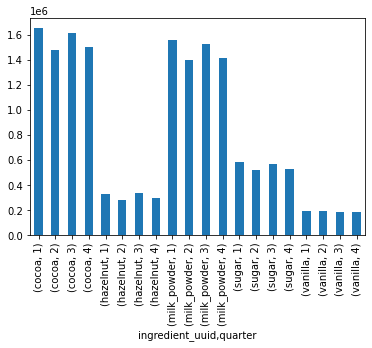

In [29]:
# barchat summary of the ingredient quarterly demand
rec_dem.groupby(['ingredient_uuid','quarter'])['dem_qty'].sum().plot.bar()

In [30]:
# demand sum of each ingredient by quarter   
igd_dem_qrt=rec_dem.groupby(['ingredient_uuid','quarter'])['dem_qty'].sum().to_frame().reset_index()
igd_dem_qrt

,ingredient_uuid,quarter,dem_qty
0,cocoa,1,1653177
1,cocoa,2,1482766
2,cocoa,3,1616210
3,cocoa,4,1500432
4,hazelnut,1,331932
5,hazelnut,2,286396
6,hazelnut,3,337238
7,hazelnut,4,298347
8,milk_powder,1,1557165
9,milk_powder,2,1399785


In [31]:
# merge 'igd_dem_qrt' with 'fastest_supplier'
qrt_dem_fastest= igd_dem_qrt.merge(fastest_supplier, on='ingredient_uuid', how='inner')
qrt_dem_fastest

,ingredient_uuid,quarter,dem_qty,supp_id,cost_per_unit,unit_name,country_of_origin,total_tax_per_unit,time_to_deliver
0,cocoa,1,1653177,megacorp,2500.0,tonne,ghana,14,12
1,cocoa,2,1482766,megacorp,2500.0,tonne,ghana,14,12
2,cocoa,3,1616210,megacorp,2500.0,tonne,ghana,14,12
3,cocoa,4,1500432,megacorp,2500.0,tonne,ghana,14,12
4,hazelnut,1,331932,omni_inc,1925.0,tonne,italy,12,3
5,hazelnut,2,286396,omni_inc,1925.0,tonne,italy,12,3
6,hazelnut,3,337238,omni_inc,1925.0,tonne,italy,12,3
7,hazelnut,4,298347,omni_inc,1925.0,tonne,italy,12,3
8,milk_powder,1,1557165,omni_inc,3120.0,tonne,switzerland,0,2
9,milk_powder,2,1399785,omni_inc,3120.0,tonne,switzerland,0,2


ingredient_uuid
cocoa          AxesSubplot(0.125,0.125;0.775x0.755)
hazelnut       AxesSubplot(0.125,0.125;0.775x0.755)
milk_powder    AxesSubplot(0.125,0.125;0.775x0.755)
sugar          AxesSubplot(0.125,0.125;0.775x0.755)
vanilla        AxesSubplot(0.125,0.125;0.775x0.755)
dtype: object

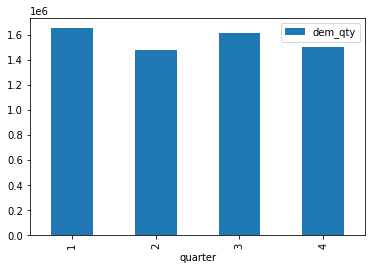

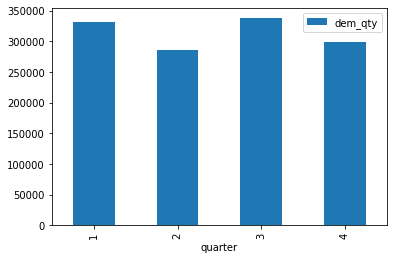

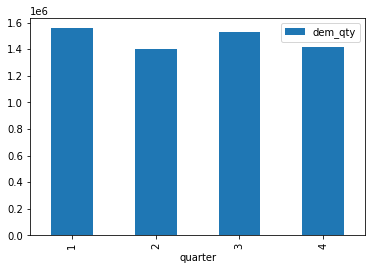

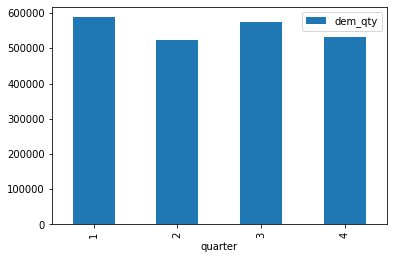

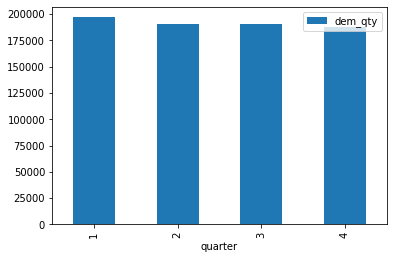

In [32]:
# ingredient demand summaried by quarter shown by bar chart in quarters    
qrt_dem_fastest.groupby(['ingredient_uuid','quarter'])['dem_qty'].sum().reset_index()\
.groupby('ingredient_uuid').plot.bar(x='quarter',y='dem_qty')

In [33]:
# add 'total_cost_tax' column, = ('cost_per_unit'+ 'total_tax_per_unit')*'dem_qty'. Summarize the result into a table. 
qrt_dem_fastest['total_cost_tax']=(qrt_dem_fastest['cost_per_unit']+qrt_dem_fastest['total_tax_per_unit'])\
*qrt_dem_fastest['dem_qty']
qrt_dem_fastest.groupby('quarter')['total_cost_tax'].sum().to_frame()

,total_cost_tax
quarter,
1,9.976242e+09
2,8.937479e+09
3,9.794698e+09
4,9.063127e+09


# Forecast demand for receipe 1 - Section 2

In [34]:
import pandas as pd

## Import the historic data

In [35]:
df = pd.read_csv("./demand_trend.csv", index_col=0)
df

,date,demand
0,2019-01-01,NaN
1,2019-01-02,71.0
2,2019-01-03,70.0
3,2019-01-04,86.0
4,2019-01-05,60.0
...,...,...
1061,2021-11-27,1141.0
1062,2021-11-28,NaN
1063,2021-11-29,1738.5
1064,2021-11-30,NaN


In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1066 entries, 0 to 1065
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   date    1066 non-null   object 
 1   demand  811 non-null    float64
dtypes: float64(1), object(1)
memory usage: 25.0+ KB


<AxesSubplot:xlabel='date'>

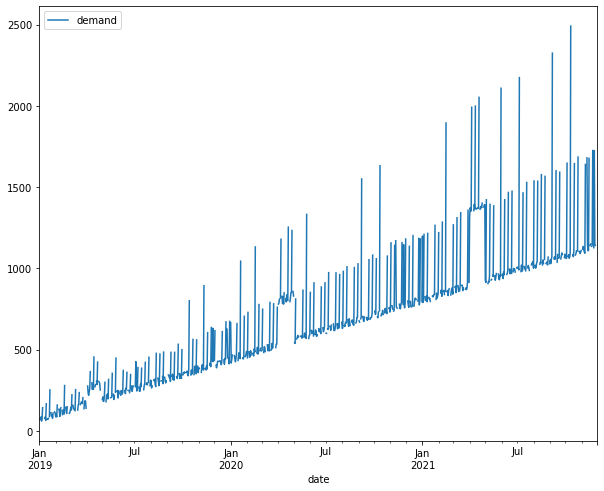

In [37]:
# visualize the demand trend by date
df['date']= pd.to_datetime(df['date'])
q= df[['date','demand']]
q.plot(x='date', y='demand', figsize=(10,8))

## Process nan and missing data

In [38]:
df.isna().sum()

date        0
demand    255
dtype: int64

In [39]:
# create column 'y' using the 'demand' column. Fill the na in 'demand' with forwardfill and backfill.   
df['y']=df.fillna(method= 'ffill').fillna(method= 'bfill')['demand']
df

,date,demand,y
0,2019-01-01,NaN,71.0
1,2019-01-02,71.0,71.0
2,2019-01-03,70.0,70.0
3,2019-01-04,86.0,86.0
4,2019-01-05,60.0,60.0
...,...,...,...
1061,2021-11-27,1141.0,1141.0
1062,2021-11-28,NaN,1141.0
1063,2021-11-29,1738.5,1738.5
1064,2021-11-30,NaN,1738.5


In [40]:
# reset the index and rename the 'index' column as 'basic_trend'
df= df.reset_index().rename(columns= {'index':'basic_trend'})
df.head()

,basic_trend,date,demand,y
0,0,2019-01-01,NaN,71.0
1,1,2019-01-02,71.0,71.0
2,2,2019-01-03,70.0,70.0
3,3,2019-01-04,86.0,86.0
4,4,2019-01-05,60.0,60.0


In [41]:
# drop na rows in 'y' column
df= df.dropna(subset=['y'])
df

,basic_trend,date,demand,y
0,0,2019-01-01,NaN,71.0
1,1,2019-01-02,71.0,71.0
2,2,2019-01-03,70.0,70.0
3,3,2019-01-04,86.0,86.0
4,4,2019-01-05,60.0,60.0
...,...,...,...,...
1061,1061,2021-11-27,1141.0,1141.0
1062,1062,2021-11-28,NaN,1141.0
1063,1063,2021-11-29,1738.5,1738.5
1064,1064,2021-11-30,NaN,1738.5


In [42]:
# fill na in 'demand'
df['demand']= df.fillna(method='ffill').fillna(method= 'bfill')['demand']
df

,basic_trend,date,demand,y
0,0,2019-01-01,71.0,71.0
1,1,2019-01-02,71.0,71.0
2,2,2019-01-03,70.0,70.0
3,3,2019-01-04,86.0,86.0
4,4,2019-01-05,60.0,60.0
...,...,...,...,...
1061,1061,2021-11-27,1141.0,1141.0
1062,1062,2021-11-28,1141.0,1141.0
1063,1063,2021-11-29,1738.5,1738.5
1064,1064,2021-11-30,1738.5,1738.5


## Create rolling data features and the date_based features 

In [43]:
# adding 'holiday' column and convert the column into boolean data 0/1
from pandas.tseries.holiday import USFederalHolidayCalendar as calendar 

cal= calendar()
holidays= cal.holidays(start=df['date'].min(), end=df['date'].max())

df['holiday'] = df['date'].isin(holidays)

In [44]:
df['holiday']= df['holiday'].astype(int)
df

,basic_trend,date,demand,y,holiday
0,0,2019-01-01,71.0,71.0,1
1,1,2019-01-02,71.0,71.0,0
2,2,2019-01-03,70.0,70.0,0
3,3,2019-01-04,86.0,86.0,0
4,4,2019-01-05,60.0,60.0,0
...,...,...,...,...,...
1061,1061,2021-11-27,1141.0,1141.0,0
1062,1062,2021-11-28,1141.0,1141.0,0
1063,1063,2021-11-29,1738.5,1738.5,0
1064,1064,2021-11-30,1738.5,1738.5,0


In [45]:
# add 'day_of_week', 'month_of_year','rolling_7days-Avg', 'rolling_10days-Avg','rolling_30days-Avg'
df['day_of_week']= df['date'].dt.day_of_week
df['month_of_year']= df['date'].dt.month
df['rol_7']= df['demand'].rolling(7).mean()
df['rol_10']= df['demand'].rolling(10).mean()
df['rol_30']= df['demand'].rolling(30).mean()
df

,basic_trend,date,demand,y,holiday,day_of_week,month_of_year,rol_7,rol_10,rol_30
0,0,2019-01-01,71.0,71.0,1,1,1,NaN,NaN,NaN
1,1,2019-01-02,71.0,71.0,0,2,1,NaN,NaN,NaN
2,2,2019-01-03,70.0,70.0,0,3,1,NaN,NaN,NaN
3,3,2019-01-04,86.0,86.0,0,4,1,NaN,NaN,NaN
4,4,2019-01-05,60.0,60.0,0,5,1,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
1061,1061,2021-11-27,1141.0,1141.0,0,5,11,1390.571429,1316.90,1290.150000
1062,1062,2021-11-28,1141.0,1141.0,0,6,11,1390.571429,1316.00,1291.816667
1063,1063,2021-11-29,1738.5,1738.5,0,0,11,1392.500000,1374.85,1313.100000
1064,1064,2021-11-30,1738.5,1738.5,0,1,11,1394.428571,1435.20,1334.050000


## Remove created na

In [46]:
df=df.dropna()
df.head()

,basic_trend,date,demand,y,holiday,day_of_week,month_of_year,rol_7,rol_10,rol_30
29,29,2019-01-30,117.0,117.0,0,2,1,101.857143,132.9,103.500000
30,30,2019-01-31,109.0,109.0,0,3,1,104.571429,118.6,104.766667
31,31,2019-02-01,86.0,86.0,0,4,2,102.714286,102.0,105.266667
32,32,2019-02-02,102.0,102.0,0,5,2,106.285714,101.0,106.333333
33,33,2019-02-03,86.0,86.0,0,6,2,102.857143,100.6,106.333333


## Define X & y

In [47]:
# 1: define X & y. 'date' is the index for X. 
# 2: a later step after 'coef_' report for linear model:drop non-significant features 'month_of_year','rol_30'
X= df.drop(['y','demand','month_of_year','rol_30','basic_trend'],axis=1).set_index('date')
y= df['y']

In [48]:
y

29       117.0
30       109.0
31        86.0
32       102.0
33        86.0
         ...  
1061    1141.0
1062    1141.0
1063    1738.5
1064    1738.5
1065    1156.0
Name: y, Length: 1037, dtype: float64

In [49]:
X

,holiday,day_of_week,rol_7,rol_10
date,,,,
2019-01-30,0,2,101.857143,132.90
2019-01-31,0,3,104.571429,118.60
2019-02-01,0,4,102.714286,102.00
2019-02-02,0,5,106.285714,101.00
2019-02-03,0,6,102.857143,100.60
...,...,...,...,...
2021-11-27,0,5,1390.571429,1316.90
2021-11-28,0,6,1390.571429,1316.00
2021-11-29,0,0,1392.500000,1374.85


## Use MinMaxScaler to scale the data 

In [50]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.compose import make_column_transformer
import numpy as np
transformer= make_column_transformer(
    (MinMaxScaler(), ['holiday']),
    (MinMaxScaler(), ['day_of_week']),
    (MinMaxScaler(), ['rol_7']),
    (MinMaxScaler(), ['rol_10']))

X_scaled= transformer.fit_transform(X)
X_scaled

array([[0.00000000e+00, 3.33333333e-01, 0.00000000e+00, 2.11021461e-02],
       [0.00000000e+00, 5.00000000e-01, 1.80647001e-03, 1.17597099e-02],
       [0.00000000e+00, 6.66666667e-01, 5.70464215e-04, 9.14644105e-04],
       ...,
       [0.00000000e+00, 0.00000000e+00, 8.58976492e-01, 8.32489465e-01],
       [0.00000000e+00, 1.66666667e-01, 8.60260037e-01, 8.71917159e-01],
       [0.00000000e+00, 3.33333333e-01, 8.63017280e-01, 8.72897135e-01]])

In [51]:
# transfer X_scaled into dataframe
X_scaled= pd.DataFrame( data= X_scaled, columns=X.columns)

In [52]:
# check the min and max values to cross check the scale function worked 
X_scaled.min()

holiday        0.0
day_of_week    0.0
rol_7          0.0
rol_10         0.0
dtype: float64

In [53]:
X_scaled.max()

holiday        1.0
day_of_week    1.0
rol_7          1.0
rol_10         1.0
dtype: float64

<AxesSubplot:>

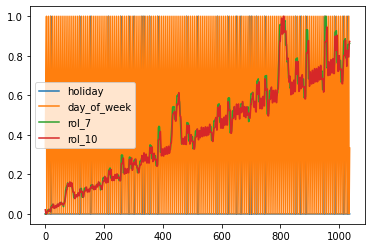

In [54]:
# visulize X_scaled for cross checking and observing the trend
X_scaled.plot()

## Feature & Model selection 

Test 4 models: linear regression, decision tree regressor, KNN regressor, SGD regressor 

Model 1: linear regression  
Pros:It performs well when the dataset is linearly separable. It is easy to implemented and interpreted and efficient to train.
Cons:It cannot combine features together- features cannot interact. It over-simplifies problems by assuming linear relationship among the variables.

In [55]:
from sklearn import linear_model 
reg= linear_model.LinearRegression()
reg.fit(X_scaled,y)

LinearRegression()

In [56]:
# a quick test of r2 score
from sklearn.metrics import r2_score
r2_score(reg.predict(X_scaled),y)

0.8473156628039933

In [57]:
intercept, coef= reg.intercept_, reg.coef_

In [58]:
pd.Series(data= [reg.intercept_] + list(reg.coef_), index=['intercept']+ list(X.columns)) 

intercept       289.076405
holiday         334.849326
day_of_week    -363.719979
rol_7          1845.262861
rol_10         -374.774249
dtype: float64

In [59]:
# the most significant feature is rol_7
# remove non-significant features in the'X= df.drop(['demand','y'],axis=1).set_index('date')' above

<AxesSubplot:>

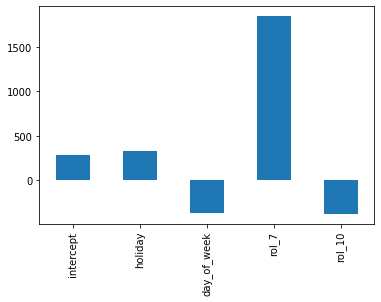

In [60]:
# show the selected feature in bar chart
pd.Series(data= [reg.intercept_] + list(reg.coef_), index=['intercept']+ list(X.columns)).plot.bar() 

Model 2: decision tree regressor (DTR)

Pros: It is easy to interpret, understand, and visualize. It is one of the quickest ways to identify relationships between variables and the most significant variable. Decision trees are not largely influenced by outliers/missing values,it can handle both numerical& categorical variables.  
Cons: A small change in the data tends to cause a big difference in the tree structure, which causes instability.
Overfitting is one of the practical difficulties. It happens when the learning algorithm continues developing hypotheses  that reduce the training set error but at the cost of increasing test set error. But this issue can be resolved by pruning and setting constraints on the model parameters.
It is also relatively expensive as the amount of time taken and the complexity levels are greater.

In [61]:
from sklearn.tree import DecisionTreeRegressor 
dtr= DecisionTreeRegressor(random_state=0)

Model 3:  KNN regressor. 

Pros: KNN is simple to understand and implement.it can be used for classification and regression. 
Cons: as dataset grows efficiency or speed of algorith decliens very fast. It needs homogeneour features, it is sensitive to outliers. 

In [62]:
# Weights decrease when distance increases 
from sklearn.neighbors import KNeighborsRegressor 
knn = KNeighborsRegressor(n_neighbors=10, weights= 'distance')

Model 4- the SGD regressor model 

Pros: a single training example is being processed, it is computationally fast and easy to fit in the memory
Cons: It loses the advantage of vectorized operations as it deals with only a single example at a time.

In [63]:
from sklearn.linear_model import SGDRegressor
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
import numpy as np

sgdr = SGDRegressor()

## Setup train,split,test for CrossValidation - K-Fold, TimeSeriesSplit and ShuffleSplit 

### 1. K-Fold cross validation

Use K-fold cross validation to train the data and provide a report to evaluate the key metrics: max_error, mean_absolute_error and r2 score. 

In [64]:
from sklearn.model_selection import KFold
kfcv= KFold(n_splits= 15)

lin_scores = []
dtr_scores = []
knn_scores = []
sgdr_scores= []

In [65]:
# Build a report dataframt to provide a report summary 
report = pd.DataFrame(columns=['split','max_error_lin','r2_lin','mae_lin','max_error_dtr','r2_dtr',
                               'mae_dtr','max_error_knn','r2_knn','mae_knn','max_error_sgdr','r2_sgdr','mae_sgdr'])

n=0 

In [66]:
from sklearn.metrics import r2_score
from sklearn.metrics import max_error
from sklearn.metrics import mean_absolute_error

for train, test in kfcv.split(X_scaled):
    X_train, X_test = X_scaled.iloc[train], X_scaled.iloc[test]
    y_train, y_test = y.iloc[train], y.iloc[test]
    
    reg.fit(X_train, y_train)
    dtr.fit(X_train, y_train)
    knn.fit(X_train, y_train)
    sgdr.fit(X_train, y_train)
    
    reg_y_pred = reg.predict( X_test )
    dtr_y_pred = dtr.predict( X_test )
    knn_y_pred = knn.predict( X_test )
    sgdr_y_pred = sgdr.predict( X_test )
  
    report= report.append({'split': n,
                           'max_error_lin': max_error(reg_y_pred,y_test),
                           'r2_lin': r2_score(reg_y_pred,y_test), 
                           'mae_lin':mean_absolute_error(reg_y_pred,y_test),
                           'max_error_dtr': max_error(dtr_y_pred,y_test),
                           'r2_dtr': r2_score(dtr_y_pred,y_test),
                           'mae_dtr':mean_absolute_error(dtr_y_pred,y_test),
                           'max_error_knn': max_error(knn_y_pred,y_test),
                           'r2_knn': r2_score(knn_y_pred,y_test), 
                           'mae_knn':mean_absolute_error(knn_y_pred,y_test),
                           'max_error_sgdr': max_error(sgdr_y_pred,y_test),
                           'r2_sgdr': r2_score(sgdr_y_pred,y_test), 
                           'mae_sgdr':mean_absolute_error(sgdr_y_pred,y_test)},
                            ignore_index=True)

    n+=1

C:\Users\shuqi\AppData\Local\Temp\ipykernel_8100\3676593868.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  report= report.append({'split': n,
C:\Users\shuqi\AppData\Local\Temp\ipykernel_8100\3676593868.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  report= report.append({'split': n,
C:\Users\shuqi\AppData\Local\Temp\ipykernel_8100\3676593868.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  report= report.append({'split': n,
C:\Users\shuqi\AppData\Local\Temp\ipykernel_8100\3676593868.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  report= report.append({'split': n,
C:\Users\shuqi\AppData\Local\Temp\ipykernel_8100\367

In [67]:
report

,split,max_error_lin,r2_lin,mae_lin,max_error_dtr,r2_dtr,mae_dtr,max_error_knn,r2_knn,mae_knn,max_error_sgdr,r2_sgdr,mae_sgdr
0,0.0,403.510573,0.338354,97.510761,177.5,-0.43932,62.921429,468.346371,-1.984432,108.567511,360.226532,0.345164,87.878065
1,1.0,360.664295,0.511341,79.270032,117.5,0.428076,32.957143,301.038727,0.498066,34.988117,342.212316,0.505134,73.71649
2,2.0,235.882911,0.511538,78.427873,172.5,0.222828,50.721014,245.828482,0.646641,30.422259,221.785181,0.50786,72.109126
3,3.0,212.949813,0.597026,80.482763,348.0,-0.012396,63.195652,345.790763,0.617069,49.68798,224.998072,0.560231,79.025884
4,4.0,326.64223,0.594188,79.180488,316.75,0.490299,76.778986,248.139885,0.694616,48.794161,303.253816,0.575601,76.222549
5,5.0,333.564626,0.457364,91.021332,444.75,0.175701,93.474638,420.143129,0.363325,76.042608,388.0068,0.341464,94.396072
6,6.0,419.888375,0.548063,106.122431,458.25,0.499577,96.525362,322.047448,0.694759,76.776522,437.653873,0.435648,114.079029
7,7.0,380.165933,0.340025,85.16985,325.5,-0.10612,136.978261,372.755483,0.607022,53.289727,398.406641,0.271201,88.593968
8,8.0,539.281054,0.227809,110.230289,408.75,0.501774,126.916667,411.661031,0.769054,63.328532,558.097694,0.118602,113.983441
9,9.0,328.100459,0.267002,104.563493,379.5,0.575363,102.496377,336.600502,0.700968,69.398256,315.516022,0.174213,109.717792


In [68]:
# average of each metrix 
report.mean()

split               7.000000
max_error_lin     470.248456
r2_lin              0.191098
mae_lin           115.286817
max_error_dtr     474.083333
r2_dtr              0.294702
mae_dtr           124.943112
max_error_knn     454.924729
r2_knn              0.435566
mae_knn            79.431427
max_error_sgdr    488.509519
r2_sgdr             0.072151
mae_sgdr          116.628283
dtype: float64

In [69]:
# variance of each metrix - how divergent the dataset is  
report.var()

split                20.000000
max_error_lin     43209.406489
r2_lin                0.213444
mae_lin            1449.512593
max_error_dtr     81385.077381
r2_dtr                0.080182
mae_dtr            5070.265714
max_error_knn     42081.642227
r2_knn                0.458256
mae_knn            1329.773436
max_error_sgdr    52453.468031
r2_sgdr               0.321323
mae_sgdr           1670.589043
dtype: float64

Report summary- KFold cross validation: 

KNN is the best model tested, with a mean r2 score of 0.435566. r2 score represents the proportion of the variance for a dependent variable that's explained by an independent variabl. r2 score can be higher, i.e. >0.50.

Except the extreme score for the 0th fold, mean R2 is 0.608423.mae_knn and max_error_knn are both the lowest among the models.

We will contibue testing- using different cross validation method: TimeSeriesSplit.  

Next step: select the highest scored model and cross validation method, and visualize the predicted data and test data for comparision.

### Visualization - KFold cross validation for K-Nearest Neighbour regression model 

In [71]:
# traing test split manually - 3/4 training, validation on 1/4
X_train, X_test = X_scaled.iloc[ : int(0.75*len(X_scaled)) ], X_scaled.iloc[ int(0.75*len(X_scaled)) : ]
y_train, y_test = y.iloc[ : int(0.75*len(y)) ], y.iloc[ int(0.75*len(y)) : ]

In [72]:
# train model - KNN regressor. Weights decrease when distance increases 
from sklearn.neighbors import KNeighborsRegressor 
knn = KNeighborsRegressor(n_neighbors=5, weights= 'distance')

In [73]:
knn.fit(X_train,y_train) 

KNeighborsRegressor(weights='distance')

In [74]:
preds= knn.predict(X_test)
preds

array([ 909.98451626,  851.51375948,  849.17421713,  836.4871442 ,
        854.62896514, 1251.36549524, 1306.46115112,  860.27727896,
        836.85442407,  840.70396416,  859.10471713,  873.42428572,
       1252.19344286, 1288.20173485,  920.8666722 ,  841.53656934,
        836.94100648,  846.79551608,  855.47044284, 1457.21924778,
       1383.99076502, 1243.62221234,  841.79747521,  842.8822341 ,
        849.74965704,  860.44350387, 1543.55867089, 1367.81650081,
       1250.51415857,  841.70476764,  842.91871407,  849.74326803,
        860.44200339, 1543.44037111, 1366.79865161, 1251.24226085,
        841.68005633,  842.92951363,  849.73003509,  860.43517521,
       1461.0835754 , 1379.9710599 , 1241.00315097,  842.01042579,
        842.69843334,  850.00135803,  854.82337797, 1444.38140363,
       1442.55599276, 1038.09497283,  847.40050533,  851.01760198,
        843.9634782 ,  855.80056303, 1202.0694431 , 1706.20285828,
        844.20864134,  852.80224132,  846.79227568,  838.76101

In [75]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape, len(preds)

((777, 4), (260, 4), (777,), (260,), 260)

In [76]:
comp = pd.DataFrame(index= X.index)
comp

""
date
2019-01-30
2019-01-31
2019-02-01
2019-02-02
2019-02-03
...
2021-11-27
2021-11-28
2021-11-29


In [77]:
comp['y_true'] = y.values
len(comp)

1037

In [78]:
# fill the prediction blank positions with nan, concat with 'preds' values  
preds = [ np.nan ] * X_train.shape[0]  + list(preds)
preds

[nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan

In [79]:
# add preds into the df
comp['preds'] = preds

In [80]:
comp

,y_true,preds
date,,
2019-01-30,117.0,NaN
2019-01-31,109.0,NaN
2019-02-01,86.0,NaN
2019-02-02,102.0,NaN
2019-02-03,86.0,NaN
...,...,...
2021-11-27,1141.0,849.976618
2021-11-28,1141.0,860.582931
2021-11-29,1738.5,1459.640368


Visualize the predicted data (orange) with the test data set (blue in the same data period). Observe how well the algorithm performes. 

<AxesSubplot:xlabel='date'>

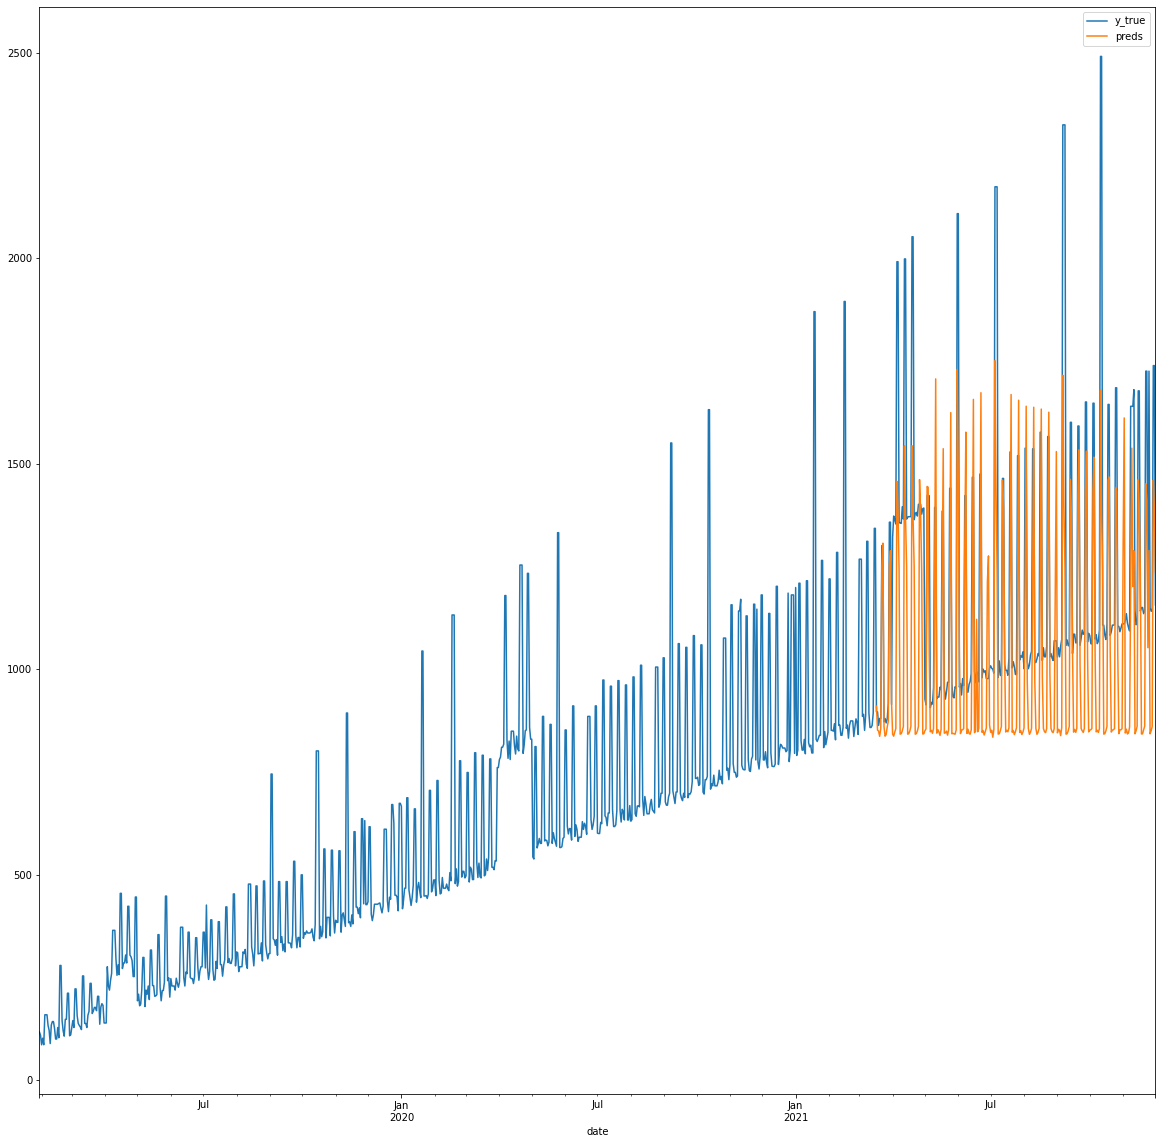

In [176]:
comp.plot(figsize=(20,20))

Summary: The predicted data didn't catch the increased trend well, although it predicted some spiked trend.  

Next Step: Using ShuffleSplit cross validation method to test the 4 models. 

Visualize the predicted data and test data on KNN regression for comparision to evaluate the model prediction accuracy.

### 2. ShuffleSplit to split the data and evaluate the key metrics for the 4 models

In [82]:
# build up the report dataframe to include the key metrics: max_error, mean_absolute_error and r2 score.
import pandas as pd
report = pd.DataFrame( columns=['split','max_error_lin','r2_lin', 'mae_lin',
                                'max_error_dtr','r2_dtr', 'mae_dtr',
                                'max_error_knn','r2_knn', 'mae_knn', 
                                'max_error_sgdr','r2_sgdr', 'mae_sgdr'
                                ] )
n= 0

In [83]:
from sklearn.model_selection import ShuffleSplit

rs = ShuffleSplit(n_splits=100, test_size=0.25, random_state=0)

In [84]:
import numpy as np
from sklearn.linear_model import SGDRegressor
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor 
from sklearn.tree import DecisionTreeRegressor

lin_reg = LinearRegression().fit(X_scaled, y)
dtr = DecisionTreeRegressor(random_state=0)
KNN = KNeighborsRegressor(n_neighbors=5, weights= 'distance')
sgdr = SGDRegressor()

for train_index, test_index in rs.split(X):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
        
    reg.fit(X_train, y_train)
    sgdr.fit(X_train, y_train)
    KNN.fit(X_train, y_train)
    dtr.fit(X_train, y_train)
    
    lin_y_pred = reg.predict( X_test )
    sgdr_y_pred = reg.predict( X_test )
    KNN_y_pred = KNN.predict( X_test )
    dtr_y_pred = dtr.predict( X_test )
    
    report= report.append({'split': n,
                           'max_error_lin':max_error(lin_y_pred,y_test),
                           'r2_lin': r2_score(lin_y_pred,y_test), 
                           'mae_lin':mean_absolute_error(lin_y_pred,y_test),
                           'max_error_dtr': max_error(dtr_y_pred,y_test),
                           'r2_dtr': r2_score(dtr_y_pred,y_test), 
                           'mae_dtr':mean_absolute_error(dtr_y_pred,y_test),
                           'max_error_knn': max_error(KNN_y_pred,y_test),
                           'r2_knn': r2_score(KNN_y_pred,y_test), 
                           'mae_knn':mean_absolute_error(KNN_y_pred,y_test),
                           'max_error_sgdr': max_error(sgdr_y_pred,y_test),
                           'r2_sgdr': r2_score(sgdr_y_pred,y_test),
                           'mae_sgdr':mean_absolute_error(sgdr_y_pred,y_test)},
                            ignore_index=True)
    n+=1  
    

C:\Users\shuqi\AppData\Local\Temp\ipykernel_8100\2715692971.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  report= report.append({'split': n,
C:\Users\shuqi\AppData\Local\Temp\ipykernel_8100\2715692971.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  report= report.append({'split': n,
C:\Users\shuqi\AppData\Local\Temp\ipykernel_8100\2715692971.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  report= report.append({'split': n,
C:\Users\shuqi\AppData\Local\Temp\ipykernel_8100\2715692971.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  report= report.append({'split': n,
C:\Users\shuqi\AppData\Local\Temp\ipykernel_8100\271

In [85]:
report

,split,max_error_lin,r2_lin,mae_lin,max_error_dtr,r2_dtr,mae_dtr,max_error_knn,r2_knn,mae_knn,max_error_sgdr,r2_sgdr,mae_sgdr
0,0.0,936.355814,0.760166,132.780114,1267.25,0.835005,83.579808,1266.141287,0.415503,166.312554,936.355814,0.760166,132.780114
1,1.0,793.125793,0.818449,119.605219,1266.25,0.847528,77.674038,1253.189831,0.534452,151.02089,793.125793,0.818449,119.605219
2,2.0,814.185268,0.811638,122.36939,890.25,0.916432,69.108654,1163.356909,0.596808,153.625042,814.185268,0.811638,122.36939
3,3.0,774.731621,0.868888,117.594582,1089.75,0.898815,75.285577,1245.453765,0.681772,144.895681,774.731621,0.868888,117.594582
4,4.0,939.536116,0.797881,124.433602,1026.75,0.843016,90.133654,1315.038005,0.469527,164.111551,939.536116,0.797881,124.433602
...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,95.0,650.573967,0.866046,106.700052,1183.25,0.898277,63.881731,1259.617606,0.575727,150.969315,650.573967,0.866046,106.700052
96,96.0,722.096689,0.85913,109.634914,510.0,0.918488,62.135577,1082.414932,0.646696,145.640292,722.096689,0.85913,109.634914
97,97.0,737.209642,0.800382,124.729437,1089.75,0.865637,78.858654,1256.020854,0.462721,160.026661,737.209642,0.800382,124.729437
98,98.0,535.862007,0.85441,106.700165,1089.75,0.869416,75.541346,1158.789267,0.664378,144.381994,535.862007,0.85441,106.700165


Create a r2_mean_report to have a clear summary of the r2_score.  

In [86]:
r2_mean_report = pd.DataFrame( columns=['r2_knn_mean','r2_sgdr_mean','r2_lin_mean','r2_dtr_mean'] )
n= 0

r2_knn_mean= r2_score(KNN_y_pred,y_test).mean()
r2_sgdr_mean= r2_score(sgdr_y_pred,y_test).mean()
r2_lin_mean= r2_score(lin_y_pred,y_test).mean()
r2_dtr_mean= r2_score(dtr_y_pred,y_test).mean()

ar2_mean_report = r2_mean_report.append({'r2_knn_mean': r2_knn_mean,
                                'r2_sgdr_mean':r2_sgdr_mean,
                                'r2_lin_mean':r2_lin_mean,
                                'r2_dtr_mean': r2_dtr_mean}, 
                                ignore_index= True)
n+=1

r2_mean_report

C:\Users\shuqi\AppData\Local\Temp\ipykernel_8100\2383220893.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  ar2_mean_report = r2_mean_report.append({'r2_knn_mean': r2_knn_mean,


,r2_knn_mean,r2_sgdr_mean,r2_lin_mean,r2_dtr_mean


Create a max_error_mean_report to have a clear summary of the max_error_mean.

In [87]:
max_error_mean_report = pd.DataFrame( columns=['max_error_knn_mean','max_error_sgdr_mean','max_error_lin_mean','max_error_dtr_mean'] )
m= 0

max_error_knn_mean= max_error(KNN_y_pred,y_test).mean()
max_error_sgdr_mean= max_error(sgdr_y_pred,y_test).mean()
max_error_lin_mean= max_error(lin_y_pred,y_test).mean()
max_error_dtr_mean= max_error(dtr_y_pred,y_test).mean()

max_error_mean_report = max_error_mean_report.append({'max_error_knn_mean': max_error_knn_mean,
                                'max_error_sgdr_mean':max_error_sgdr_mean,
                                'max_error_lin_mean':max_error_lin_mean,
                                'max_error_dtr_mean':max_error_dtr_mean}, 
                                ignore_index= True)
m+=1

max_error_mean_report

C:\Users\shuqi\AppData\Local\Temp\ipykernel_8100\532847308.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  max_error_mean_report = max_error_mean_report.append({'max_error_knn_mean': max_error_knn_mean,


,max_error_knn_mean,max_error_sgdr_mean,max_error_lin_mean,max_error_dtr_mean
0,1067.719333,801.034834,801.034834,890.25


Create a mae_mean_report to have a clear summary of the mean of mean_absolute_error. 

In [88]:
mae_mean_report = pd.DataFrame( columns=['mae_knn_mean','mae_sgdr_mean','mae_lin_mean','mae_dtr_mean'] )
m= 0

mae_knn_mean= mean_absolute_error(KNN_y_pred,y_test).mean()
mae_sgdr_mean= mean_absolute_error(sgdr_y_pred,y_test).mean()
mae_lin_mean= mean_absolute_error(lin_y_pred,y_test).mean()
mae_dtr_mean= mean_absolute_error(dtr_y_pred,y_test).mean()

mae_mean_report = mae_mean_report.append({'mae_knn_mean': mae_knn_mean,
                                'mae_sgdr_mean':mae_sgdr_mean,
                                'mae_lin_mean':mae_lin_mean,
                                'mae_dtr_mean':mae_dtr_mean},
                                ignore_index= True)
m+=1

mae_mean_report

C:\Users\shuqi\AppData\Local\Temp\ipykernel_8100\2850408021.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  mae_mean_report = mae_mean_report.append({'mae_knn_mean': mae_knn_mean,


,mae_knn_mean,mae_sgdr_mean,mae_lin_mean,mae_dtr_mean
0,147.822759,116.536264,116.536264,76.484615


Summary:  

The best model is DTR. 
r2 score is 0.876388, represents the majority of the data trend. Mean absolute erros is 76.484615 which is the lowest. Max error mean (890.25) is the 2nd lowest among the tested models. 

Linear model and SGD are the second best, with a similar r2 score of 0.830317. Mean absolute erros is 116.536264 which is slightly higher than it is for linear model. Max error mean (801.034834) is the lowest among the tested models.    

## Visualize the predicted data - DecisionTreeRegressor

In [89]:
# training test split manual- 3/4 training, validation on 1/4
X_train, X_test = X_scaled.iloc[ : int(0.75*len(X_scaled)) ], X_scaled.iloc[ int(0.75*len(X_scaled)) : ]
y_train, y_test = y.iloc[ : int(0.75*len(y)) ], y.iloc[ int(0.75*len(y)) : ]

In [90]:
y_train

29      117.0
30      109.0
31       86.0
32      102.0
33       86.0
        ...  
801     858.0
802     863.0
803     893.0
804    1342.5
805    1342.5
Name: y, Length: 777, dtype: float64

In [91]:
y_test

806      896.0
807      896.0
808      863.0
809      880.0
810      880.0
         ...  
1061    1141.0
1062    1141.0
1063    1738.5
1064    1738.5
1065    1156.0
Name: y, Length: 260, dtype: float64

In [92]:
X_train

,holiday,day_of_week,rol_7,rol_10
0,0.0,0.333333,0.000000,0.021102
1,0.0,0.500000,0.001806,0.011760
2,0.0,0.666667,0.000570,0.000915
3,0.0,0.833333,0.002947,0.000261
4,0.0,1.000000,0.000666,0.000000
...,...,...,...,...
772,0.0,0.666667,0.594899,0.588410
773,0.0,0.833333,0.596040,0.561983
774,0.0,1.000000,0.596515,0.562506
775,0.0,0.000000,0.599510,0.592069


In [93]:
X_test

,holiday,day_of_week,rol_7,rol_10
777,0.0,0.333333,0.602791,0.624702
778,0.0,0.500000,0.606403,0.597589
779,0.0,0.666667,0.606879,0.568321
780,0.0,0.833333,0.608495,0.567471
781,0.0,1.000000,0.607259,0.568909
...,...,...,...,...
1032,0.0,0.833333,0.857693,0.794630
1033,0.0,1.000000,0.857693,0.794042
1034,0.0,0.000000,0.858976,0.832489
1035,0.0,0.166667,0.860260,0.871917


In [94]:
# import decision tree regressor
from sklearn.tree import DecisionTreeRegressor
dtr = DecisionTreeRegressor(random_state=0)
dtr.fit(X_train, y_train)

DecisionTreeRegressor(random_state=0)

In [95]:
preds_dtr= reg.predict(X_test)
preds_dtr

array([163.04012079, 153.34377908, 143.64421913, 133.94181326,
       124.23586457, 182.45326004, 172.74026288, 163.03354527,
       153.33187563, 143.63266481, 133.92837061, 124.22768475,
       182.45518119, 172.75239894, 163.05222226, 153.39477604,
       143.74362693, 134.08646155, 124.42438851, 182.70764685,
       173.06056004, 163.3993354 , 153.69885367, 143.99260726,
       134.28706285, 124.58357121, 182.80444626, 173.09479577,
       163.3912964 , 153.69429577, 143.99760194, 134.29054253,
       124.58669363, 182.81194163, 173.10713406, 163.40263919,
       153.70513562, 144.00776409, 134.30350482, 124.60206767,
       182.75820624, 172.98390472, 163.2809439 , 153.58416014,
       143.88720162, 134.1393213 , 124.3871681 , 182.61512243,
       172.91255123, 163.21281903, 153.46132047, 143.71092918,
       134.00968286, 124.31396385, 182.53699114, 172.82516337,
       163.06780594, 153.37089212, 143.67258707, 133.97705063,
       124.27174921, 182.49245786, 172.78268844, 163.08

In [96]:
dtr.fit(X_train,y_train)

DecisionTreeRegressor(random_state=0)

In [97]:
#set index for X as the index for 'comp_dtr'
comp_dtr= pd.DataFrame(index=X.index)
comp_dtr

""
date
2019-01-30
2019-01-31
2019-02-01
2019-02-02
2019-02-03
...
2021-11-27
2021-11-28
2021-11-29


In [98]:
# assign values for y to 'y_true' column
comp_dtr['y_true'] = y.values
comp_dtr['y_true']

date
2019-01-30     117.0
2019-01-31     109.0
2019-02-01      86.0
2019-02-02     102.0
2019-02-03      86.0
               ...  
2021-11-27    1141.0
2021-11-28    1141.0
2021-11-29    1738.5
2021-11-30    1738.5
2021-12-01    1156.0
Name: y_true, Length: 1037, dtype: float64

In [99]:
# fill the prediction blank positions with nan, concat with 'preds' values  
preds_dtr = [ np.nan ] * X_train.shape[0]  + list(preds_dtr)
preds_dtr

[nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan

In [100]:
X_train

,holiday,day_of_week,rol_7,rol_10
0,0.0,0.333333,0.000000,0.021102
1,0.0,0.500000,0.001806,0.011760
2,0.0,0.666667,0.000570,0.000915
3,0.0,0.833333,0.002947,0.000261
4,0.0,1.000000,0.000666,0.000000
...,...,...,...,...
772,0.0,0.666667,0.594899,0.588410
773,0.0,0.833333,0.596040,0.561983
774,0.0,1.000000,0.596515,0.562506
775,0.0,0.000000,0.599510,0.592069


In [101]:
# add preds into the dataframe
comp_dtr['preds'] = preds_dtr
comp_dtr

,y_true,preds
date,,
2019-01-30,117.0,NaN
2019-01-31,109.0,NaN
2019-02-01,86.0,NaN
2019-02-02,102.0,NaN
2019-02-03,86.0,NaN
...,...,...
2021-11-27,1141.0,134.189292
2021-11-28,1141.0,124.485029
2021-11-29,1738.5,182.706978


<AxesSubplot:xlabel='date'>

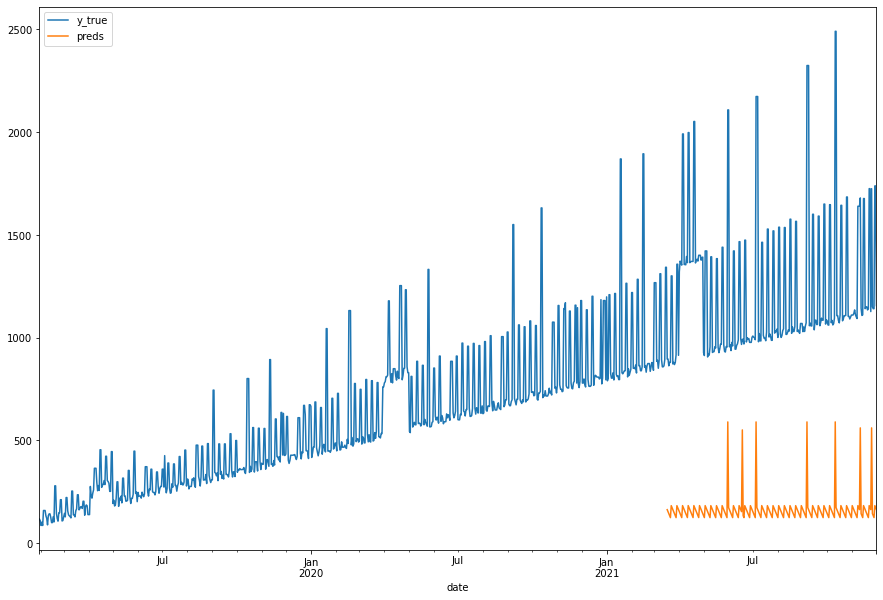

In [102]:
comp_dtr.plot(figsize=(15,10))

Summary: 

The DecisionTreeRegressor model may haven't finished converged. Or the optimized feature hasn't been found. 

Let's test the Linear model which has equally good metrixs perforamnce.  

### Visualize the predicted data - Linear Model

In [103]:
# training test split manual- 3/4 training, validation on 1/4
X_train, X_test = X_scaled.iloc[ : int(0.75*len(X_scaled)) ], X_scaled.iloc[ int(0.75*len(X_scaled)) : ]
y_train, y_test = y.iloc[ : int(0.75*len(y)) ], y.iloc[ int(0.75*len(y)) : ]

In [104]:
# import linear model and fit train and test data  
from sklearn import linear_model
reg = linear_model.LinearRegression()
reg.fit(X_scaled,y)

LinearRegression()

In [105]:
# define the predicts from linear model as preds_lin
preds_lin= reg.predict(X_test)
preds_lin

array([1046.02117879, 1002.22913484,  953.45547389,  896.13630436,
        832.69689004, 1178.21381768, 1099.51319314, 1035.19674852,
        983.09381744,  935.11995771,  874.74075748,  819.94700664,
       1181.55956373, 1119.2483844 , 1065.16450492, 1081.26186267,
       1107.21439033, 1119.56219657, 1124.0294387 , 1571.45835798,
       1594.7921483 , 1600.94459748, 1546.67726654, 1482.9727547 ,
       1416.10208929, 1356.48559654, 1706.07466728, 1631.10340078,
       1571.76857318, 1528.7403829 , 1486.20179387, 1421.00390196,
       1361.0692922 , 1717.18513774, 1649.95263607, 1589.10620244,
       1545.23342939, 1501.5503665 , 1441.00989927, 1384.88191855,
       1633.65413544, 1458.08637691, 1399.68794951, 1357.36985985,
       1314.7518791 , 1186.6596911 , 1051.82124149, 1418.23388972,
       1360.08620071, 1306.84694986, 1173.34484691, 1041.54203504,
        990.12863259,  947.54029486, 1306.22342878, 1229.18122644,
       1081.52524753, 1037.46423925,  991.12247537,  949.10547

In [106]:
# fit train and test data 
reg.fit(X_train,y_train)

LinearRegression()

In [107]:
# define the dataframe 'comp_lin', set the index for X as the dataframe index
comp_lin= pd.DataFrame(index=X.index)
comp_lin

""
date
2019-01-30
2019-01-31
2019-02-01
2019-02-02
2019-02-03
...
2021-11-27
2021-11-28
2021-11-29


In [108]:
# add column 'y_true' in dataframe, the values are equal to the values for y 
comp_lin['y_true'] = y.values
comp_lin['y_true']

date
2019-01-30     117.0
2019-01-31     109.0
2019-02-01      86.0
2019-02-02     102.0
2019-02-03      86.0
               ...  
2021-11-27    1141.0
2021-11-28    1141.0
2021-11-29    1738.5
2021-11-30    1738.5
2021-12-01    1156.0
Name: y_true, Length: 1037, dtype: float64

In [109]:
# fill the prediction blank positions with nan, concat with 'preds' values  
preds_lin = [ np.nan ] * X_train.shape[0]  + list(preds_lin)
preds_lin

[nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan

In [110]:
# show the X_train data for examination, all the data is between 0-1 
X_train

,holiday,day_of_week,rol_7,rol_10
0,0.0,0.333333,0.000000,0.021102
1,0.0,0.500000,0.001806,0.011760
2,0.0,0.666667,0.000570,0.000915
3,0.0,0.833333,0.002947,0.000261
4,0.0,1.000000,0.000666,0.000000
...,...,...,...,...
772,0.0,0.666667,0.594899,0.588410
773,0.0,0.833333,0.596040,0.561983
774,0.0,1.000000,0.596515,0.562506
775,0.0,0.000000,0.599510,0.592069


In [111]:
# add predictions into the dataframe
comp_lin['preds'] = preds_lin
comp_lin

,y_true,preds
date,,
2019-01-30,117.0,NaN
2019-01-31,109.0,NaN
2019-02-01,86.0,NaN
2019-02-02,102.0,NaN
2019-02-03,86.0,NaN
...,...,...
2021-11-27,1141.0,1270.838604
2021-11-28,1141.0,1210.438969
2021-11-29,1738.5,1562.118210


<AxesSubplot:xlabel='date'>

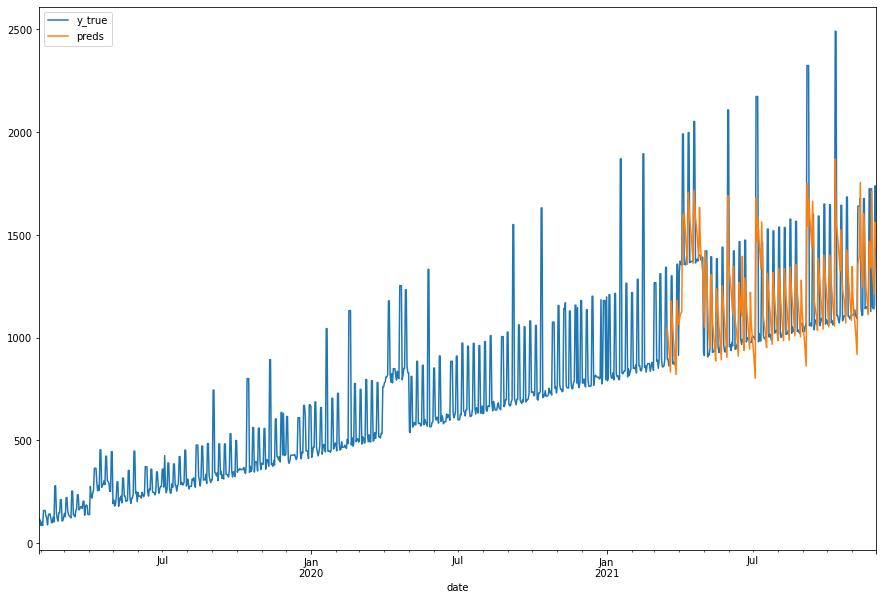

In [112]:
# visulize the linear predictions (orange against the blue test data)
comp_lin.plot(figsize=(15,10))

Summary: 

Linear model provides good prediction, catching the demand spikes well.
Linear model appears have better prediction power than DTR. We will use Linear model for future development/ build on.  

Let's continue experimenting the different cross-validation method and evaluate the predicted demand in comparision to test data. 

Using TimeSeriesSplit Cross Validation to train and evalute the key metrics performance and provide a report to evaluate the key metrics: max_error, mean_absolute_error and r2 score. 

## 3. TimeSeriesSplit Cross valdiation  

In [113]:
# import the relevant matrixs into report 
report = pd.DataFrame( columns=['split',
                                'max_error_lin','r2_lin', 'mae_lin',
                                'max_error_dtr','r2_dtr', 'mae_dtr',
                                'max_error_knn','r2_knn', 'mae_knn', 
                                'max_error_sgdr','r2_sgdr', 'mae_sgdr'
                                ] )
n= 0

In [114]:
import numpy as np
from sklearn.model_selection import TimeSeriesSplit
tscv = TimeSeriesSplit(n_splits=30)    

In [115]:
# import the models, fit the data and assign the predicted calues to 'y_pred'
# assign the values to the matrixs selected above
from sklearn.linear_model import SGDRegressor
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor 
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestClassifier

lin_reg = LinearRegression().fit(X_scaled, y)
dtr = DecisionTreeRegressor(random_state=0)
KNN = KNeighborsRegressor(n_neighbors=5, weights= 'distance')
sgdr = SGDRegressor()

for train_index, test_index in tscv.split(X):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    
    reg.fit(X_train, y_train)
    sgdr.fit(X_train, y_train)
    KNN.fit(X_train, y_train)
    dtr.fit(X_train, y_train)
        
    lin_y_pred = reg.predict( X_test )
    sgdr_y_pred = reg.predict( X_test )
    KNN_y_pred = KNN.predict( X_test )
    dtr_y_pred = dtr.predict( X_test )
       
    report= report.append({'split': n,
                           'max_error_lin':max_error(lin_y_pred,y_test),
                           'r2_lin': r2_score(lin_y_pred,y_test), 
                           'mae_lin':mean_absolute_error(lin_y_pred,y_test),
                           'max_error_dtr': max_error(dtr_y_pred,y_test),
                           'r2_dtr': r2_score(dtr_y_pred,y_test), 
                           'mae_dtr':mean_absolute_error(dtr_y_pred,y_test),
                           'max_error_knn': max_error(KNN_y_pred,y_test),
                           'r2_knn': r2_score(KNN_y_pred,y_test), 
                           'mae_knn':mean_absolute_error(KNN_y_pred,y_test),
                           'max_error_sgdr': max_error(sgdr_y_pred,y_test),
                           'r2_sgdr': r2_score(sgdr_y_pred,y_test),
                           'mae_sgdr':mean_absolute_error(sgdr_y_pred,y_test)},
                            ignore_index=True)
    n+=1  

C:\Users\shuqi\AppData\Local\Temp\ipykernel_8100\2647265288.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  report= report.append({'split': n,
C:\Users\shuqi\AppData\Local\Temp\ipykernel_8100\2647265288.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  report= report.append({'split': n,
C:\Users\shuqi\AppData\Local\Temp\ipykernel_8100\2647265288.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  report= report.append({'split': n,
C:\Users\shuqi\AppData\Local\Temp\ipykernel_8100\2647265288.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  report= report.append({'split': n,
C:\Users\shuqi\AppData\Local\Temp\ipykernel_8100\264

In [116]:
report

,split,max_error_lin,r2_lin,mae_lin,max_error_dtr,r2_dtr,mae_dtr,max_error_knn,r2_knn,mae_knn,max_error_sgdr,r2_sgdr,mae_sgdr
0,0.0,117.626243,0.328034,38.261251,201.0,-5.708244,72.469697,272.757052,-160.680248,75.98565,117.626243,0.328034,38.261251
1,1.0,110.479698,-0.087663,41.335743,185.5,-0.201106,56.469697,144.934956,-35.921591,85.912266,110.479698,-0.087663,41.335743
2,2.0,131.737757,0.201543,37.197652,162.5,-0.223998,59.772727,243.266883,-7.745743,54.238756,131.737757,0.201543,37.197652
3,3.0,75.35347,0.303378,30.180308,141.0,0.642717,36.674242,124.902491,-3.54533,42.023597,75.35347,0.303378,30.180308
4,4.0,106.57009,-0.029476,44.839608,186.0,0.156365,43.212121,149.018073,-2.280867,67.799754,106.57009,-0.029476,44.839608
5,5.0,269.824769,-1.243757,63.10851,272.25,0.018453,34.621212,328.034455,-5.234902,74.891776,269.824769,-1.243757,63.10851
6,6.0,256.211369,-0.218733,67.161533,457.0,0.415332,69.136364,387.200523,-7.075969,90.353463,256.211369,-0.218733,67.161533
7,7.0,321.742342,-0.706415,72.561553,330.75,0.455984,83.871212,395.380351,-5.860793,104.595399,321.742342,-0.706415,72.561553
8,8.0,107.045651,0.448654,56.41693,373.0,0.600403,86.598485,189.610516,-0.326742,72.183464,107.045651,0.448654,56.41693
9,9.0,375.546406,-1.214818,84.476243,357.0,0.472119,69.356061,414.58486,-4.479151,124.154726,375.546406,-1.214818,84.476243


In [117]:
r2_mean_report = pd.DataFrame( columns=['r2_knn_mean','r2_sgdr_mean','r2_lin_mean','r2_dtr_mean'] )
n= 0

r2_knn_mean= r2_score(KNN_y_pred,y_test).mean()
r2_sgdr_mean= r2_score(sgdr_y_pred,y_test).mean()
r2_lin_mean= r2_score(lin_y_pred,y_test).mean()
r2_dtr_mean= r2_score(dtr_y_pred,y_test).mean()

r2_mean_report = r2_mean_report.append({'r2_knn_mean': r2_knn_mean,
                                'r2_sgdr_mean':r2_sgdr_mean,
                                'r2_lin_mean':r2_lin_mean,
                                'r2_dtr_mean': r2_dtr_mean}, 
                                ignore_index= True)
n+=1

r2_mean_report

C:\Users\shuqi\AppData\Local\Temp\ipykernel_8100\4161368561.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  r2_mean_report = r2_mean_report.append({'r2_knn_mean': r2_knn_mean,


,r2_knn_mean,r2_sgdr_mean,r2_lin_mean,r2_dtr_mean
0,-0.660607,0.226304,0.226304,0.244837


In [118]:
max_error_mean_report = pd.DataFrame( columns=['max_error_knn_mean','max_error_sgdr_mean','max_error_lin_mean','max_error_dtr_mean'] )
m= 0

max_error_knn_mean= max_error(KNN_y_pred,y_test).mean()
max_error_sgdr_mean= max_error(sgdr_y_pred,y_test).mean()
max_error_lin_mean= max_error(lin_y_pred,y_test).mean()
max_error_dtr_mean= max_error(dtr_y_pred,y_test).mean()

max_error_mean_report = max_error_mean_report.append({'max_error_knn_mean': max_error_knn_mean,
                                'max_error_sgdr_mean':max_error_sgdr_mean,
                                'max_error_lin_mean':max_error_lin_mean,
                                'max_error_dtr_mean':max_error_dtr_mean}, 
                                ignore_index= True)
m+=1

max_error_mean_report

C:\Users\shuqi\AppData\Local\Temp\ipykernel_8100\532847308.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  max_error_mean_report = max_error_mean_report.append({'max_error_knn_mean': max_error_knn_mean,


,max_error_knn_mean,max_error_sgdr_mean,max_error_lin_mean,max_error_dtr_mean
0,951.905643,323.825369,323.825369,813.75


In [119]:
mae_mean_report = pd.DataFrame( columns=['mae_knn_mean','mae_sgdr_mean','mae_lin_mean','mae_dtr_mean'] )
m= 0

mae_knn_mean= mean_absolute_error(KNN_y_pred,y_test).mean()
mae_sgdr_mean= mean_absolute_error(sgdr_y_pred,y_test).mean()
mae_lin_mean= mean_absolute_error(lin_y_pred,y_test).mean()
mae_dtr_mean= mean_absolute_error(dtr_y_pred,y_test).mean()

mae_mean_report = mae_mean_report.append({'mae_knn_mean': mae_knn_mean,
                                'mae_sgdr_mean':mae_sgdr_mean,
                                'mae_lin_mean':mae_lin_mean,
                                'mae_dtr_mean':mae_dtr_mean},
                                ignore_index= True)
m+=1

mae_mean_report

C:\Users\shuqi\AppData\Local\Temp\ipykernel_8100\2850408021.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  mae_mean_report = mae_mean_report.append({'mae_knn_mean': mae_knn_mean,


,mae_knn_mean,mae_sgdr_mean,mae_lin_mean,mae_dtr_mean
0,310.519874,144.554918,144.554918,266.151515


### Summary: 
In general the TimeSerialSplit method is not suitable for testing the models. The relatively good model is DecisionTreeRegressor. R2 score is 0.244, the max error mean is 813.75, is high. So as the MeanAbsolute Error, 266.152.


### Visulization - TimeSerialsSplit, DTR

In [120]:
# using TimeSeriesSplit Cross Validation to train and evalute the key metrix performance. 
from sklearn.model_selection import TimeSeriesSplit

# at least 3 generally. time series cross validation
tscv = TimeSeriesSplit(n_splits=50)

lin_scores = []
dtr_scores = []
knn_scores = []
sgdr_scores = []

In [121]:
from sklearn.tree import DecisionTreeRegressor

dtr = DecisionTreeRegressor(random_state=0)
dtr.fit(X_train,y_train)

DecisionTreeRegressor(random_state=0)

In [122]:
preds_dtr= dtr.predict(X_test)
preds_dtr

array([1091.  ,  913.  , 1576.5 , 1467.  ,  829.  ,  829.  ,  995.  ,
        995.  ,  829.  , 1576.5 , 1422.  ,  927.  ,  927.  ,  927.  ,
        927.  ,  927.  , 1600.5 , 2490.75, 1390.5 , 1082.  ,  980.  ,
        965.  ,  965.  , 2108.25, 1644.  , 1083.  , 1110.  ,  927.  ,
        927.  ,  927.  , 1464.  , 1401.  , 1390.5 ])

In [123]:
dtr.fit(X_train,y_train)

DecisionTreeRegressor(random_state=0)

In [124]:
X_train

,holiday,day_of_week,rol_7,rol_10
date,,,,
2019-01-30,0,2,101.857143,132.90
2019-01-31,0,3,104.571429,118.60
2019-02-01,0,4,102.714286,102.00
2019-02-02,0,5,106.285714,101.00
2019-02-03,0,6,102.857143,100.60
...,...,...,...,...
2021-10-25,0,0,1260.500000,1264.95
2021-10-26,0,1,1266.285714,1326.20
2021-10-27,0,2,1269.428571,1325.60


In [125]:
y_train

29       117.0
30       109.0
31        86.0
32       102.0
33        86.0
         ...  
1028    1684.5
1029    1684.5
1030    1104.0
1031    1104.0
1032    1091.0
Name: y, Length: 1004, dtype: float64

In [126]:
comp_dtr= pd.DataFrame(index=X.index)
comp_dtr

""
date
2019-01-30
2019-01-31
2019-02-01
2019-02-02
2019-02-03
...
2021-11-27
2021-11-28
2021-11-29


In [127]:
comp_dtr['y_true'] = y.values
comp_dtr['y_true']

date
2019-01-30     117.0
2019-01-31     109.0
2019-02-01      86.0
2019-02-02     102.0
2019-02-03      86.0
               ...  
2021-11-27    1141.0
2021-11-28    1141.0
2021-11-29    1738.5
2021-11-30    1738.5
2021-12-01    1156.0
Name: y_true, Length: 1037, dtype: float64

In [128]:
# fill the prediction blank positions with nan, concat with 'preds' values  
preds_dtr = [ np.nan ] * X_train.shape[0]  + list(preds_dtr)
preds_dtr

[nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan

In [129]:
# add preds into the df
comp_dtr['preds'] = preds_dtr
comp_dtr

,y_true,preds
date,,
2019-01-30,117.0,NaN
2019-01-31,109.0,NaN
2019-02-01,86.0,NaN
2019-02-02,102.0,NaN
2019-02-03,86.0,NaN
...,...,...
2021-11-27,1141.0,927.0
2021-11-28,1141.0,927.0
2021-11-29,1738.5,1464.0


<AxesSubplot:xlabel='date'>

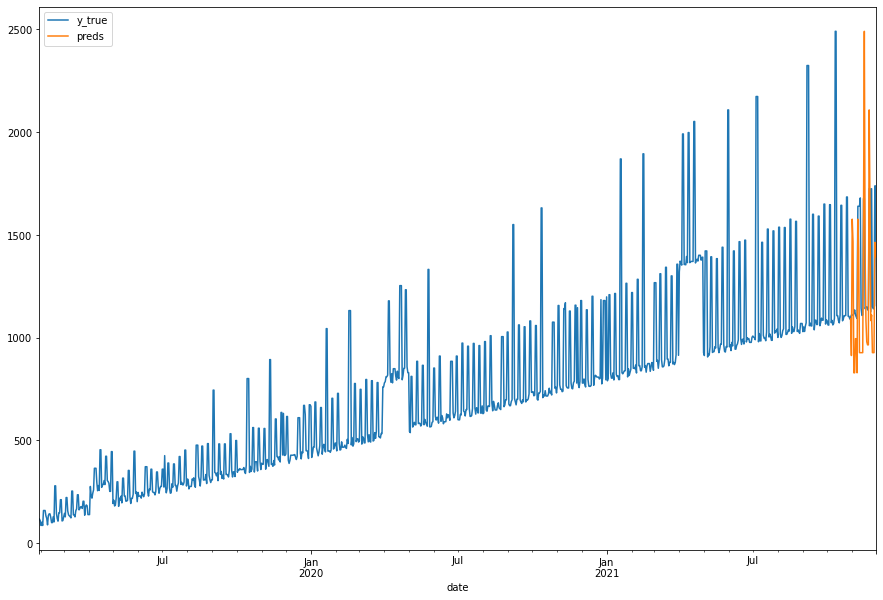

In [130]:
comp_dtr.plot(figsize=(15,10))

## Permutation feature importance (PFI)

PFI is a model inspection technique. The PFI is defined to be the decrease in a model score when a single feature value is randomly shuffled. This procedure breaks the relationship between the feature and the target, thus the drop in the model score indicates how much the model depends on the feature. 

Pros: PFI benefits from being model agnostic and can be calculated many times with different permutations of the feature. Features importance is for a particular model only. A low importance feature for a bad model (low cross-validation score) could be very important for a good model. 
Cons: The importance of two correlated feature may be undervalued. 

### PFI for Linear Regression

In [131]:
from sklearn.inspection import permutation_importance
r = permutation_importance(reg, X_scaled, y,
                           n_repeats=30,
                           random_state=0)
r

{'importances_mean': array([ 0.04804593,  0.02671736,  0.00123461, -0.0002236 ]),
 'importances_std': array([1.04803717e-02, 2.50660393e-03, 3.80235387e-05, 6.99869129e-06]),
 'importances': array([[ 0.04016066,  0.05100465,  0.05709322,  0.04840541,  0.04716162,
          0.04934551,  0.03388571,  0.060213  ,  0.04928315,  0.0636846 ,
          0.04556869,  0.0598287 ,  0.04847029,  0.05358602,  0.02820517,
          0.05992899,  0.06094977,  0.06679474,  0.03226854,  0.05150788,
          0.04411458,  0.04818266,  0.04823217,  0.05653655,  0.04108443,
          0.03910106,  0.05281361,  0.04181053,  0.02102903,  0.041127  ],
        [ 0.02989041,  0.02458507,  0.02538282,  0.02786155,  0.02080248,
          0.02763258,  0.02667661,  0.02791462,  0.02811004,  0.02815151,
          0.02577335,  0.03019582,  0.02511723,  0.02627522,  0.02408865,
          0.02972488,  0.02694715,  0.02882079,  0.02812125,  0.02574807,
          0.03426204,  0.02577286,  0.02634679,  0.0272853 ,  0.02367

In [132]:
r['importances_mean']

array([ 0.04804593,  0.02671736,  0.00123461, -0.0002236 ])

<AxesSubplot:>

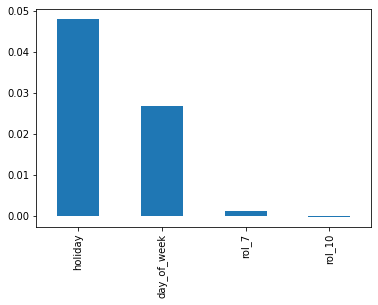

In [133]:
pd.Series(data=r['importances_mean'], index= X_scaled.columns).plot.bar()

In [134]:
scoring = ['r2', 'neg_mean_absolute_error', 'neg_mean_squared_error']
r_multi = permutation_importance(
    reg, X_scaled, y, n_repeats=30, random_state=0, scoring=scoring)

In [135]:
# import scores to evaluate the perforamnce metrix
import sklearn 
sklearn.metrics.SCORERS.keys()

dict_keys(['explained_variance', 'r2', 'max_error', 'neg_median_absolute_error', 'neg_mean_absolute_error', 'neg_mean_absolute_percentage_error', 'neg_mean_squared_error', 'neg_mean_squared_log_error', 'neg_root_mean_squared_error', 'neg_mean_poisson_deviance', 'neg_mean_gamma_deviance', 'accuracy', 'top_k_accuracy', 'roc_auc', 'roc_auc_ovr', 'roc_auc_ovo', 'roc_auc_ovr_weighted', 'roc_auc_ovo_weighted', 'balanced_accuracy', 'average_precision', 'neg_log_loss', 'neg_brier_score', 'adjusted_rand_score', 'rand_score', 'homogeneity_score', 'completeness_score', 'v_measure_score', 'mutual_info_score', 'adjusted_mutual_info_score', 'normalized_mutual_info_score', 'fowlkes_mallows_score', 'precision', 'precision_macro', 'precision_micro', 'precision_samples', 'precision_weighted', 'recall', 'recall_macro', 'recall_micro', 'recall_samples', 'recall_weighted', 'f1', 'f1_macro', 'f1_micro', 'f1_samples', 'f1_weighted', 'jaccard', 'jaccard_macro', 'jaccard_micro', 'jaccard_samples', 'jaccard_wei

In [136]:
r_multi['neg_mean_absolute_error']

{'importances_mean': array([ 2.27647439,  0.32774949,  0.03523224, -0.00638779]),
 'importances_std': array([1.10866055e+00, 1.95548344e-01, 3.54692068e-03, 6.22710476e-04]),
 'importances': array([[ 1.16898456,  3.00820938,  1.69042776,  2.42989607,  1.85664027,
          2.23250532,  1.55827088,  2.8016117 ,  2.94673929,  4.20473617,
          1.55841225,  3.26083912,  3.42585893,  2.52615009,  0.66839724,
          2.4893906 ,  3.96161232,  4.19355705, -0.14507649,  1.75674405,
          0.83477152,  2.79830925,  2.19012151,  3.74169211,  2.74297504,
          1.3301615 ,  3.28836217,  2.12820001,  0.28931447,  1.35641761],
        [ 0.50939395,  0.01575278,  0.33947051,  0.03775701,  0.01708474,
          0.21729521,  0.44032829,  0.37704565,  0.34209136,  0.39548035,
          0.24024659,  0.65365867,  0.70105014,  0.01998424,  0.72645216,
          0.32156501,  0.43402039,  0.37361644,  0.1741949 ,  0.34285544,
          0.43168233,  0.41349844,  0.36075321,  0.48884079,  0.17445

In [137]:
r_multi['neg_mean_absolute_error']['importances_mean']

array([ 2.27647439,  0.32774949,  0.03523224, -0.00638779])

In [138]:
# summary of importances_mean of the selected features 
pd.Series (data= r_multi['neg_mean_absolute_error']['importances_mean'], index=X_scaled.columns)

holiday        2.276474
day_of_week    0.327749
rol_7          0.035232
rol_10        -0.006388
dtype: float64

<AxesSubplot:>

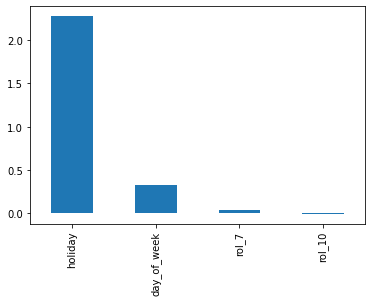

In [139]:
# the bar chat shows how much neg_mean_absolute_error go down if I replace the feature with noise/permute all the rows
pd.Series (data= r_multi['neg_mean_absolute_error']['importances_mean'], index=X_scaled.columns).plot.bar()

### Feature Creation- Combine features to creat a new feature- PolynomialFeatures

In [140]:
# Generate a new feature matrix consisting of all polynomial combinations of degree-2 features 

import numpy as np
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(2)
x_poly= poly.fit_transform(X_scaled)

In [141]:
# list the names of the generated degree-2 features 
poly.get_feature_names_out()

array(['1', 'holiday', 'day_of_week', 'rol_7', 'rol_10', 'holiday^2',
       'holiday day_of_week', 'holiday rol_7', 'holiday rol_10',
       'day_of_week^2', 'day_of_week rol_7', 'day_of_week rol_10',
       'rol_7^2', 'rol_7 rol_10', 'rol_10^2'], dtype=object)

In [142]:
# show all the degree-2 polynomial in a dataframe
x_poly= pd.DataFrame(data=x_poly, columns=poly.get_feature_names_out())
x_poly

,1,holiday,day_of_week,rol_7,rol_10,holiday^2,holiday day_of_week,holiday rol_7,holiday rol_10,day_of_week^2,day_of_week rol_7,day_of_week rol_10,rol_7^2,rol_7 rol_10,rol_10^2
0,1.0,0.0,0.333333,0.000000,0.021102,0.0,0.0,0.0,0.0,0.111111,0.000000,0.007034,0.000000e+00,0.000000e+00,4.453006e-04
1,1.0,0.0,0.500000,0.001806,0.011760,0.0,0.0,0.0,0.0,0.250000,0.000903,0.005880,3.263334e-06,2.124356e-05,1.382908e-04
2,1.0,0.0,0.666667,0.000570,0.000915,0.0,0.0,0.0,0.0,0.444444,0.000380,0.000610,3.254294e-07,5.217717e-07,8.365738e-07
3,1.0,0.0,0.833333,0.002947,0.000261,0.0,0.0,0.0,0.0,0.694444,0.002456,0.000218,8.687158e-06,7.702345e-07,6.829174e-08
4,1.0,0.0,1.000000,0.000666,0.000000,0.0,0.0,0.0,0.0,1.000000,0.000666,0.000000,4.429456e-07,0.000000e+00,0.000000e+00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1032,1.0,0.0,0.833333,0.857693,0.794630,0.0,0.0,0.0,0.0,0.694444,0.714744,0.662191,7.356372e-01,6.815483e-01,6.314364e-01
1033,1.0,0.0,1.000000,0.857693,0.794042,0.0,0.0,0.0,0.0,1.000000,0.857693,0.794042,7.356372e-01,6.810440e-01,6.305023e-01
1034,1.0,0.0,0.000000,0.858976,0.832489,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,7.378406e-01,7.150889e-01,6.930387e-01
1035,1.0,0.0,0.166667,0.860260,0.871917,0.0,0.0,0.0,0.0,0.027778,0.143377,0.145320,7.400473e-01,7.500755e-01,7.602395e-01


<AxesSubplot:>

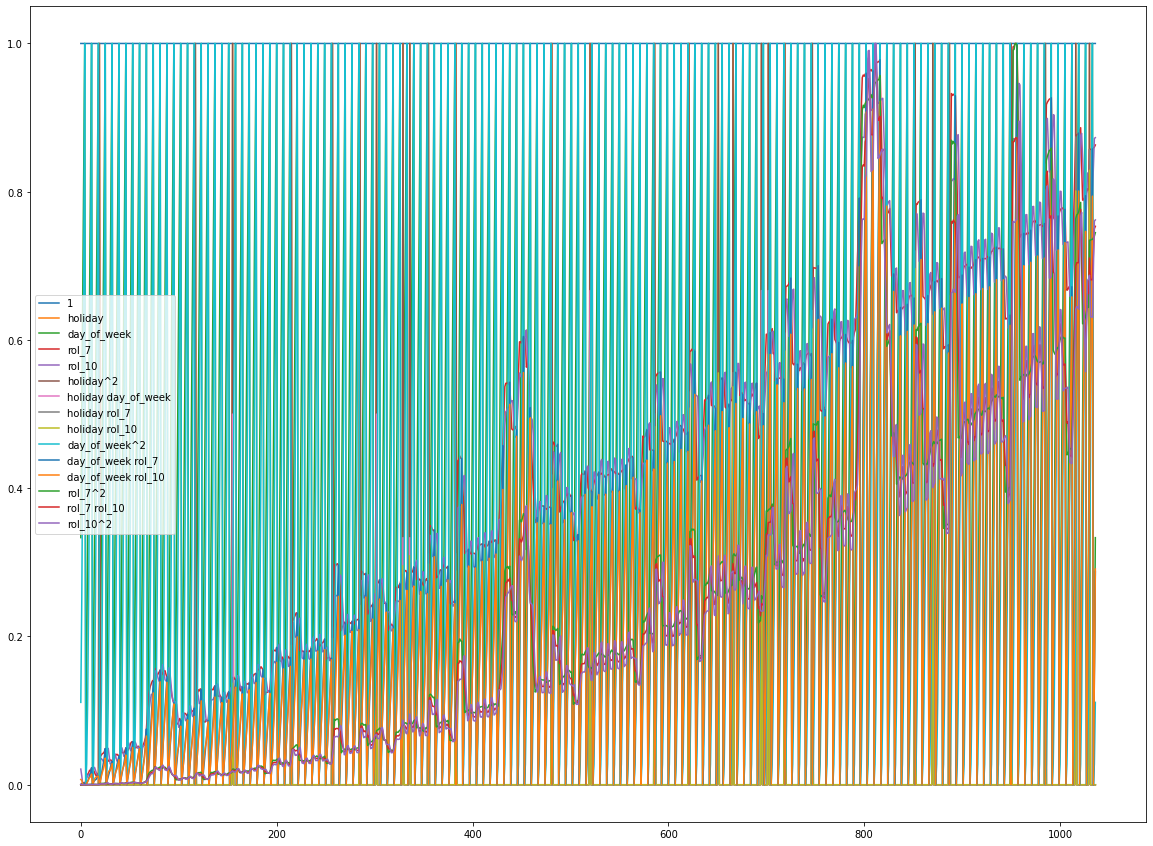

In [143]:
# examine that all the polynomial features are scaled
x_poly.plot(figsize=(20,15))

### Use permutation to see the new features' importance 

In [144]:
from sklearn.model_selection import ShuffleSplit

rs = ShuffleSplit(n_splits=100, test_size=0.33, random_state=0)

for train_index, test_index in rs.split(X):
    X_train, X_test = x_poly.iloc[train_index], x_poly.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

### Fit X_poly onto Linear Regression

In [145]:
from sklearn import linear_model
reg = linear_model.LinearRegression()
reg.fit(X_train,y_train)

LinearRegression()

In [146]:
X_train

,1,holiday,day_of_week,rol_7,rol_10,holiday^2,holiday day_of_week,holiday rol_7,holiday rol_10,day_of_week^2,day_of_week rol_7,day_of_week rol_10,rol_7^2,rol_7 rol_10,rol_10^2
961,1.0,0.0,0.666667,0.742554,0.782037,0.0,0.0,0.0,0.0,0.444444,0.495036,0.521358,0.551387,0.580705,0.611582
564,1.0,0.0,1.000000,0.441444,0.414791,0.0,0.0,0.0,0.0,1.000000,0.441444,0.414791,0.194873,0.183107,0.172052
900,1.0,0.0,1.000000,0.687600,0.648613,0.0,0.0,0.0,0.0,1.000000,0.687600,0.648613,0.472793,0.445986,0.420699
144,1.0,0.0,1.000000,0.117706,0.110803,0.0,0.0,0.0,0.0,1.000000,0.117706,0.110803,0.013855,0.013042,0.012277
652,1.0,0.0,0.500000,0.544983,0.530134,0.0,0.0,0.0,0.0,0.250000,0.272492,0.265067,0.297007,0.288914,0.281042
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1007,1.0,0.0,0.166667,0.667063,0.731715,0.0,0.0,0.0,0.0,0.027778,0.111177,0.121953,0.444973,0.488100,0.535407
181,1.0,0.0,0.166667,0.155927,0.162219,0.0,0.0,0.0,0.0,0.027778,0.025988,0.027036,0.024313,0.025294,0.026315
785,1.0,0.0,0.500000,0.595470,0.594813,0.0,0.0,0.0,0.0,0.250000,0.297735,0.297406,0.354584,0.354193,0.353802
872,1.0,0.0,1.000000,0.678472,0.637964,0.0,0.0,0.0,0.0,1.000000,0.678472,0.637964,0.460324,0.432841,0.406998


In [147]:
y_train

990     1085.00
593      648.00
929     1027.00
173      252.00
681      766.00
         ...   
1036    1110.00
210      453.00
814      880.00
901      969.00
882     2108.25
Name: y, Length: 694, dtype: float64

In [148]:
# Compare the same metric with different models
from sklearn.inspection import permutation_importance
r = permutation_importance(reg, X_test, y_test,
                           n_repeats=30,
                           random_state=0)
r 

{'importances_mean': array([0.00000000e+00, 3.29950465e-04, 4.32861148e-01, 5.62676093e+00,
        7.60986602e-01, 3.29950465e-04, 9.54553018e-03, 1.19369620e-01,
        3.26909309e-01, 4.29267719e-01, 6.79210709e+00, 4.08887331e+00,
        1.19949628e-02, 1.25350546e-01, 2.67191578e-01]),
 'importances_std': array([0.        , 0.00034078, 0.02735212, 0.29799892, 0.04330709,
        0.00034078, 0.00172943, 0.0067198 , 0.0187825 , 0.03126127,
        0.33069676, 0.22399317, 0.00277341, 0.01022837, 0.01695004]),
 'importances': array([[ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
          0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
          0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
          0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
          0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
          0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
          0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
          0.00000000e+00,  0.00000000e+00,  0.

In [149]:
r['importances_mean']

array([0.00000000e+00, 3.29950465e-04, 4.32861148e-01, 5.62676093e+00,
       7.60986602e-01, 3.29950465e-04, 9.54553018e-03, 1.19369620e-01,
       3.26909309e-01, 4.29267719e-01, 6.79210709e+00, 4.08887331e+00,
       1.19949628e-02, 1.25350546e-01, 2.67191578e-01])

<AxesSubplot:>

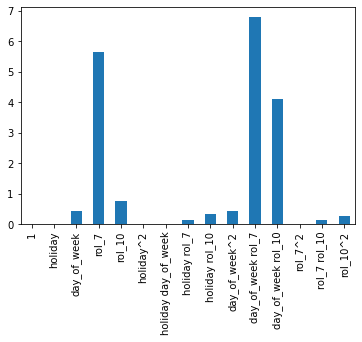

In [150]:
# negative feature importance = model improves w/o the feature, not good.
pd.Series(data=r['importances_mean'], index= x_poly.columns).plot.bar()

In [151]:
from sklearn.metrics import r2_score
r2_scores= []

In [152]:
for train_index, test_index in rs.split(x_poly):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    
    reg.fit(X_train,y_train)
    preds= reg.predict(X_test)
    r2_scores.append(r2_score(preds,y_test)) 
r2_scores

[0.7834237992577302,
 0.8233695397928751,
 0.8041743955575662,
 0.8650338708634743,
 0.8070421134523511,
 0.8643210401678889,
 0.8652008563399611,
 0.8427051000807494,
 0.8368869540504538,
 0.8617923916316617,
 0.831410230349176,
 0.8590511763642296,
 0.8367529970222513,
 0.8289729020732212,
 0.8409682050362812,
 0.8672155653423925,
 0.8435214532617097,
 0.811230497019143,
 0.8240296489041031,
 0.8500403483343764,
 0.8428436087505681,
 0.8095627283397822,
 0.8430600731675937,
 0.8435946672715656,
 0.8844666846851251,
 0.8121601955391871,
 0.8344479769473013,
 0.8538231311465552,
 0.8404996149547425,
 0.8271724743401387,
 0.8524246518148564,
 0.8616521011622531,
 0.8403031649349089,
 0.8444867154817491,
 0.847718504647663,
 0.856364318233873,
 0.8230841638730502,
 0.8523166852051218,
 0.8491866237461834,
 0.8516892861664602,
 0.8396776379784131,
 0.8169929937911394,
 0.8417564211075986,
 0.8748543161496718,
 0.8696214054119299,
 0.8264982842860826,
 0.8599374051809862,
 0.84502610600795

In [153]:
# average r2_score 
sum(r2_scores)/len(r2_scores)

0.8426435244904521

Summary: 

1. The average r2 score is 0.843, which is slightly higher than the socre without polynominoal features( 0.830317)
2. 'day_of_week rol_7' and 'day_of_week rol_10' features are significantly important.
3. Adding these two features into X in Linear model to check the impact of Linear model forecast performance.

### Add the features, Scale the data, ShuffleSplit to split the data

In [154]:
# adding 'day_of_week rol_7' and 'day_of_week rol_10' onto X
X['day_of_week rol_7']= X['day_of_week']*X['rol_7']
X['day_of_week rol_10']= X['day_of_week']*X['rol_10']
X

,holiday,day_of_week,rol_7,rol_10,day_of_week rol_7,day_of_week rol_10
date,,,,,,
2019-01-30,0,2,101.857143,132.90,203.714286,265.8
2019-01-31,0,3,104.571429,118.60,313.714286,355.8
2019-02-01,0,4,102.714286,102.00,410.857143,408.0
2019-02-02,0,5,106.285714,101.00,531.428571,505.0
2019-02-03,0,6,102.857143,100.60,617.142857,603.6
...,...,...,...,...,...,...
2021-11-27,0,5,1390.571429,1316.90,6952.857143,6584.5
2021-11-28,0,6,1390.571429,1316.00,8343.428571,7896.0
2021-11-29,0,0,1392.500000,1374.85,0.000000,0.0


In [155]:
# use MinMaxScaler to scale the data 
from sklearn.preprocessing import MinMaxScaler
from sklearn.compose import make_column_transformer
import numpy as np
transformer= make_column_transformer(
    (MinMaxScaler(), ['holiday']),
    (MinMaxScaler(), ['day_of_week']),
    (MinMaxScaler(), ['rol_7']),
    (MinMaxScaler(), ['rol_10']),
    (MinMaxScaler(), ['day_of_week rol_7']),
    (MinMaxScaler(), ['day_of_week rol_10'])
)
    

X_scaled= transformer.fit_transform(X)
X_scaled

array([[0.00000000e+00, 3.33333333e-01, 0.00000000e+00, 2.11021461e-02,
        2.11904390e-02, 2.93105730e-02],
       [0.00000000e+00, 5.00000000e-01, 1.80647001e-03, 1.17597099e-02,
        3.26326817e-02, 3.92351462e-02],
       [0.00000000e+00, 6.66666667e-01, 5.70464215e-04, 9.14644105e-04,
        4.27375194e-02, 4.49913987e-02],
       ...,
       [0.00000000e+00, 0.00000000e+00, 8.58976492e-01, 8.32489465e-01,
        0.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 1.66666667e-01, 8.60260037e-01, 8.71917159e-01,
        1.45049001e-01, 1.58263861e-01],
       [0.00000000e+00, 3.33333333e-01, 8.63017280e-01, 8.72897135e-01,
        2.90959885e-01, 3.16858542e-01]])

In [156]:
# transfer X_scaled into df
X_scaled= pd.DataFrame(data= X_scaled, columns= X.columns)

<AxesSubplot:>

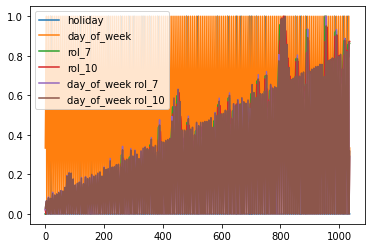

In [157]:
X_scaled.plot()

In [158]:
# model selection: linear regression  

from sklearn import linear_model
reg = linear_model.LinearRegression()
reg.fit(X_scaled,y)

LinearRegression()

### Setup train,split,test for CrossValidation - ShuffleSplit

In [159]:
# ShuffleSplit to split the data
report = pd.DataFrame( columns=['split','max_error_lin','r2_lin', 'mae_lin'] )
                                                                
n= 0

In [160]:
from sklearn.model_selection import ShuffleSplit

rs = ShuffleSplit(n_splits=100, test_size=0.25, random_state=0)

In [161]:
import numpy as np
from sklearn.metrics import r2_score

from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression().fit(X_scaled, y)
reg.fit(X_train, y_train)

for train_index, test_index in rs.split(X):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
        
    reg.fit(X_train, y_train)
        
    lin_y_pred = reg.predict( X_test )
  
    report= report.append({'split': n,
                           'max_error_lin':max_error(lin_y_pred,y_test),
                           'r2_lin': r2_score(lin_y_pred,y_test), 
                           'mae_lin':mean_absolute_error(lin_y_pred,y_test)},
                            ignore_index=True)
    n+=1  

C:\Users\shuqi\AppData\Local\Temp\ipykernel_8100\1956445476.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  report= report.append({'split': n,
C:\Users\shuqi\AppData\Local\Temp\ipykernel_8100\1956445476.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  report= report.append({'split': n,
C:\Users\shuqi\AppData\Local\Temp\ipykernel_8100\1956445476.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  report= report.append({'split': n,
C:\Users\shuqi\AppData\Local\Temp\ipykernel_8100\1956445476.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  report= report.append({'split': n,
C:\Users\shuqi\AppData\Local\Temp\ipykernel_8100\195

In [162]:
X_train

,holiday,day_of_week,rol_7,rol_10,day_of_week rol_7,day_of_week rol_10
date,,,,,,
2019-12-25,1,2,528.357143,553.00,1056.714286,1106.00
2020-09-08,0,1,928.928571,925.55,928.928571,925.55
2020-12-26,0,5,855.000000,841.80,4275.000000,4209.00
2019-03-19,0,1,171.428571,183.00,171.428571,183.00
2019-02-22,0,4,165.857143,148.70,663.428571,594.80
...,...,...,...,...,...,...
2021-11-02,0,1,1104.142857,1220.60,1104.142857,1220.60
2019-07-30,0,1,336.142857,348.90,336.142857,348.90
2021-03-25,0,3,996.571429,1011.05,2989.714286,3033.15


In [163]:
y_train

358      625.50
616     1550.25
725      775.00
77       235.50
52       107.00
         ...   
1036    1110.00
210      453.00
814      880.00
901      969.00
882     2108.25
Name: y, Length: 777, dtype: float64

In [164]:
report

,split,max_error_lin,r2_lin,mae_lin
0,0.0,795.207106,0.831187,112.023822
1,1.0,631.362353,0.866765,99.886948
2,2.0,647.578472,0.874208,102.644198
3,3.0,602.010509,0.907666,93.53881
4,4.0,794.930254,0.862488,103.878899
...,...,...,...,...
95,95.0,559.200616,0.897119,92.723407
96,96.0,610.317249,0.891433,94.301066
97,97.0,625.589024,0.863481,107.823223
98,98.0,464.916464,0.87746,100.154106


In [165]:
# list the average of meatric for easy comparision.   
report.mean()

split             49.500000
max_error_lin    626.071517
r2_lin             0.882612
mae_lin           96.998606
dtype: float64

Summary: 

In general, all the matrics have been improved. 
r2 score has been improved to 0.883. Max_error is 626.07, improved from 801.Max_absolute_mean has been improved from 116.54 to 97.00.

Let's visulize the forecast and analyze the performance. 

### Visulization - ShuffleSplit, Linear Regression

In [166]:
# training test split manual- 3/4 training, validation on 1/4
X_train, X_test = X_scaled.iloc[ : int(0.75*len(X_scaled)) ], X_scaled.iloc[ int(0.75*len(X_scaled)) : ]
y_train, y_test = y.iloc[ : int(0.75*len(y)) ], y.iloc[ int(0.75*len(y)) : ]

In [167]:
from sklearn import linear_model
reg = linear_model.LinearRegression()
reg.fit(X_scaled,y)

LinearRegression()

In [168]:
preds_lin= reg.predict(X_test)
preds_lin

array([1057.88314473, 1006.86074521,  939.37575332,  850.13680328,
        755.09965133, 1257.70985645, 1126.95285649, 1042.53878229,
        984.19952979,  920.88972089,  831.54669487,  745.90157695,
       1264.51294642, 1157.32034396, 1082.41804   , 1092.78771453,
       1087.20799865, 1037.7139951 ,  964.93527565, 1824.19293469,
       1781.61625733, 1722.73022659, 1583.06727046, 1431.20087884,
       1273.45405293, 1130.52928636, 1938.85896526, 1756.15079534,
       1628.0364318 , 1534.21875781, 1425.99601546, 1277.09967469,
       1133.79800167, 1952.35120327, 1780.05145511, 1648.14895311,
       1551.32448886, 1440.0697421 , 1293.88006852, 1150.9567225 ,
       1829.57362051, 1520.62980354, 1416.14553059, 1346.04374329,
       1259.88262193, 1079.59562695,  910.93454736, 1549.67606107,
       1445.58639547, 1349.11889882, 1163.09422562,  996.16767086,
        918.28278902,  837.0242235 , 1434.58691554, 1291.2161076 ,
       1074.52218454, 1026.86101021,  964.11285648,  893.15813

In [169]:
reg.fit(X_train,y_train)

LinearRegression()

In [170]:
X_train.shape[0]

777

In [171]:
# build dataframe with date(index for X) as index, and values for y as 'y_true'
comp_lin= pd.DataFrame(index=X.index)
comp_lin

""
date
2019-01-30
2019-01-31
2019-02-01
2019-02-02
2019-02-03
...
2021-11-27
2021-11-28
2021-11-29


In [172]:
# checking the shape of index, comp_lin legth (1,037) are matching. 
comp_lin['y_true']= y.values
comp_lin['y_true']

date
2019-01-30     117.0
2019-01-31     109.0
2019-02-01      86.0
2019-02-02     102.0
2019-02-03      86.0
               ...  
2021-11-27    1141.0
2021-11-28    1141.0
2021-11-29    1738.5
2021-11-30    1738.5
2021-12-01    1156.0
Name: y_true, Length: 1037, dtype: float64

In [173]:
# fill the prediction blank positions with nan, concat with 'preds' values to create the predict column 
pred_lin= [np.nan]* X_train.shape[0] + list(preds_lin)
pred_lin 

[nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan

In [174]:
# add preds into the dataframe with the column name as 'preds'
comp_lin['preds'] = pred_lin
comp_lin

,y_true,preds
date,,
2019-01-30,117.0,NaN
2019-01-31,109.0,NaN
2019-02-01,86.0,NaN
2019-02-02,102.0,NaN
2019-02-03,86.0,NaN
...,...,...
2021-11-27,1141.0,1157.212446
2021-11-28,1141.0,1026.182762
2021-11-29,1738.5,1766.913324


<AxesSubplot:xlabel='date'>

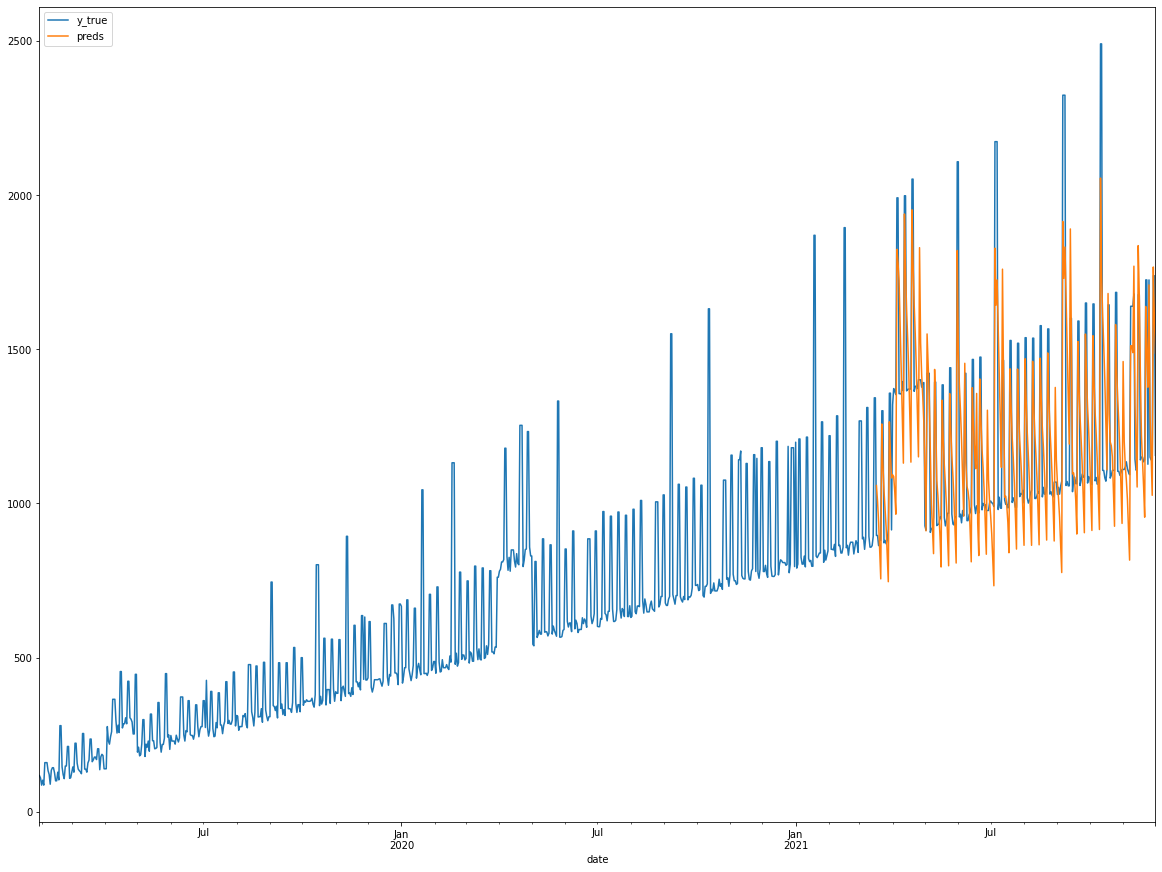

In [175]:
# visualize the dataframe to compare the predicted data and the test data
comp_lin.plot(figsize=(20,15))

Summary: 
    
In comparision with the orignal visulization for Linear model w/o polynominal features, the forecast predicts the demand spikes very well. It predicts the general demand trend well too. However the chance of predicting low demand with higher variance has increased. 

Taking the features of the these two forecast models, we can use the original forecast model to provide the low demand for reference. 

In conclusion, the polynominal features further improved the forecast accuracy of the model. We have trained a model with a r2 score of 0.883, provides a balance forecast with a good prediction of spiked demand trend and ensures sufficient supply to capture the sales and increase the sales turnover for the business.   